                             Machine Learning Course

Michela Dell'Alma

                          Protein Expression in Mice with Down Syndrome          

In [12]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import random
np.random.seed(0)
np.random.seed(0)

# 1. Preliminary analysis

### Exploratory data analysis (EDA)

Preliminary analysis only on the training data. 

Conversion of the table in pandas dataframe.

In [13]:
expr_data = pd.read_csv("train.csv")
expr_data.head()
expr_data.shape

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,0.650511,1.158653,0.580172,2.230388,3.179675,0.533686,0.440101,5.033898,0.200985,1.589221,...,0.047287,0.337121,0.203356,0.191360,0.590874,0.112145,0.110109,0.160637,1.329248,t-CS-m
1,0.365907,0.651296,0.810468,2.597217,4.131603,0.537554,0.249235,6.099538,0.226362,1.700578,...,0.521112,0.419544,0.231619,0.393897,0.252572,0.352687,0.085545,0.328537,1.008023,t-SC-s
2,0.260145,0.397996,0.229522,2.643311,4.303648,0.268394,0.050916,3.130455,0.273792,2.534531,...,0.047407,0.053130,0.096325,0.257402,0.246015,0.203979,0.039188,0.008315,1.193634,c-SC-s
3,0.239489,0.271240,0.766816,1.872419,2.424971,0.322269,0.386791,2.351832,0.034265,0.472725,...,0.273651,0.162382,0.234056,0.180657,0.351388,0.103896,0.302341,0.166020,0.689970,c-CS-m
4,0.617112,0.751737,0.050685,2.356175,3.494138,0.506875,0.310644,3.855825,0.309879,1.033428,...,0.172488,0.014086,0.191145,0.149622,0.310434,0.151685,0.180055,0.383039,1.737274,t-CS-s


(367, 77)

In [3]:
for col in expr_data.columns: 
    print(col) 

DYRK1A_N
ITSN1_N
BDNF_N
NR1_N
NR2A_N
pAKT_N
pBRAF_N
pCAMKII_N
pCREB_N
pELK_N
pERK_N
pJNK_N
PKCA_N
pMEK_N
pNR1_N
pNR2A_N
pNR2B_N
pPKCAB_N
pRSK_N
AKT_N
BRAF_N
CAMKII_N
CREB_N
ELK_N
ERK_N
GSK3B_N
JNK_N
MEK_N
TRKA_N
RSK_N
APP_N
Bcatenin_N
SOD1_N
MTOR_N
P38_N
pMTOR_N
DSCR1_N
AMPKA_N
NR2B_N
pNUMB_N
RAPTOR_N
TIAM1_N
pP70S6_N
NUMB_N
P70S6_N
pGSK3B_N
pPKCG_N
CDK5_N
S6_N
ADARB1_N
AcetylH3K9_N
RRP1_N
BAX_N
ARC_N
ERBB4_N
nNOS_N
Tau_N
GFAP_N
GluR3_N
GluR4_N
IL1B_N
P3525_N
pCASP9_N
PSD95_N
SNCA_N
Ubiquitin_N
pGSK3B_Tyr216_N
SHH_N
BAD_N
pS6_N
pCFOS_N
SYP_N
H3AcK18_N
EGR1_N
H3MeK4_N
CaNA_N
class


In [4]:
expr_data['class'].unique()

array(['t-CS-m', 't-SC-s', 'c-SC-s', 'c-CS-m', 't-CS-s', 't-SC-m',
       'c-CS-s', 'c-SC-m'], dtype=object)

There are **76 parameters**/proteins (in the training dataset), and **8** different **classes**

Given the continous variables, preliminary assessment about the **population distribution** of the variables using the data of the observed samples. 

In [7]:
expr_data.describe()
expr_data.info()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pGSK3B_Tyr216_N,SHH_N,BAD_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.424625,0.643605,0.311180,2.324768,3.788704,0.256276,0.224600,3.555490,0.243811,1.361222,...,0.870282,0.241272,0.211454,0.191250,0.198571,0.450839,0.199175,0.212576,0.229978,1.392812
std,0.165598,0.251751,0.191381,0.412055,0.929206,0.172512,0.150476,1.388081,0.167339,0.369549,...,0.226685,0.157856,0.153802,0.133527,0.141261,0.191931,0.156829,0.147442,0.163359,0.356708
min,0.145327,0.032259,0.001439,1.143688,1.747448,0.000572,0.000455,0.857449,0.001038,0.287026,...,0.221665,0.000968,0.001024,0.000122,0.000244,0.003932,0.000436,0.000104,0.000615,0.544998
25%,0.296623,0.462402,0.151569,2.055808,3.108681,0.120131,0.090671,2.391252,0.115012,1.096785,...,0.725639,0.122783,0.091101,0.079493,0.081964,0.312539,0.070970,0.103308,0.106642,1.130921
50%,0.380145,0.634401,0.292885,2.311875,3.750456,0.232278,0.216556,3.312988,0.219943,1.316959,...,0.868826,0.218357,0.178011,0.169801,0.180120,0.456710,0.164363,0.184093,0.197006,1.383210
75%,0.505240,0.816380,0.443048,2.576403,4.310340,0.351412,0.324535,4.571592,0.344517,1.580478,...,1.017593,0.338267,0.317530,0.286457,0.281337,0.583650,0.288723,0.291664,0.334832,1.680786
max,0.992220,1.369690,0.859073,3.917915,8.526835,0.858684,0.767396,7.049225,0.814884,2.698669,...,1.449276,0.752059,0.904601,0.683065,0.805513,1.180934,0.761225,0.813475,0.851257,2.432510


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         367 non-null    float64
 1   ITSN1_N          367 non-null    float64
 2   BDNF_N           367 non-null    float64
 3   NR1_N            367 non-null    float64
 4   NR2A_N           367 non-null    float64
 5   pAKT_N           367 non-null    float64
 6   pBRAF_N          367 non-null    float64
 7   pCAMKII_N        367 non-null    float64
 8   pCREB_N          367 non-null    float64
 9   pELK_N           367 non-null    float64
 10  pERK_N           367 non-null    float64
 11  pJNK_N           367 non-null    float64
 12  PKCA_N           367 non-null    float64
 13  pMEK_N           367 non-null    float64
 14  pNR1_N           367 non-null    float64
 15  pNR2A_N          367 non-null    float64
 16  pNR2B_N          367 non-null    float64
 17  pPKCAB_N        

**Boxplots** of the population distribution to inspect visually the protein expression distribution

The code has been reported only for the first boxplot, the other have been designed in the same manner. 

We have attached a summary figure.

In [ ]:
expr_data_quant = expr_data.columns.drop(['class'])
expr_data_quant = expr_data[expr_data_quant]
first_block = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N']
second_block = ['pBRAF_N', 'pCAMKII_N','pCREB_N','pELK_N','pERK_N','EGR1_N']
third_block = ['pJNK_N', 'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N']
fourth_block = ['pPKCAB_N', 'pRSK_N', 'AKT_N','BRAF_N', 'CAMKII_N','H3AcK18_N']
fifth_block = ['CREB_N','ELK_N','ERK_N', 'GSK3B_N','JNK_N','MEK_N', 'TRKA_N']
sixth_block = ['RSK_N','APP_N','Bcatenin_N', 'SOD1_N','MTOR_N','SYP_N','CaNA_N']
seventh_block = ['P38_N','pMTOR_N','DSCR1_N','AMPKA_N','NR2B_N','pNUMB_N']
eigth_block = ['RAPTOR_N','TIAM1_N','pP70S6_N','NUMB_N','P70S6_N','pCFOS_N']
ninth_block = ['pGSK3B_N','pPKCG_N','CDK5_N','S6_N','ADARB1_N','AcetylH3K9_N']
tenth_block = ['RRP1_N','BAX_N','ARC_N','ERBB4_N','nNOS_N','Tau_N','H3MeK4_N']
eleventh_block = ['GFAP_N','GluR3_N','GluR4_N','IL1B_N','P3525_N','pCASP9_N']
twelvth_block = ['SNCA_N','Ubiquitin_N','pGSK3B_Tyr216_N']
thirth_block = ['SHH_N','BAD_N','pS6_N']
expr_data_quant_1 = expr_data_quant[first_block]
expr_data_quant_2 = expr_data_quant[second_block]
expr_data_quant_3 = expr_data_quant[third_block]
expr_data_quant_4 = expr_data_quant[fourth_block]
expr_data_quant_5 = expr_data_quant[fifth_block]
expr_data_quant_6 = expr_data_quant[sixth_block]
expr_data_quant_7= expr_data_quant[seventh_block]
expr_data_quant_8 = expr_data_quant[eigth_block]
expr_data_quant_9 = expr_data_quant[ninth_block]
expr_data_quant_10 = expr_data_quant[tenth_block]
expr_data_quant_11 = expr_data_quant[eleventh_block]
expr_data_quant_12 = expr_data_quant[twelvth_block]
expr_data_quant_13 = expr_data_quant[thirth_block]
#vals, names = [],[]
#for i, col in enumerate(expr_data_quant_1.columns):
#    vals.append(expr_data_quant_1[col].values)
#    names.append(col)

#plt.boxplot(vals, labels=names, patch_artist=True)
#plt.ylim(0,8)
#plt.show()

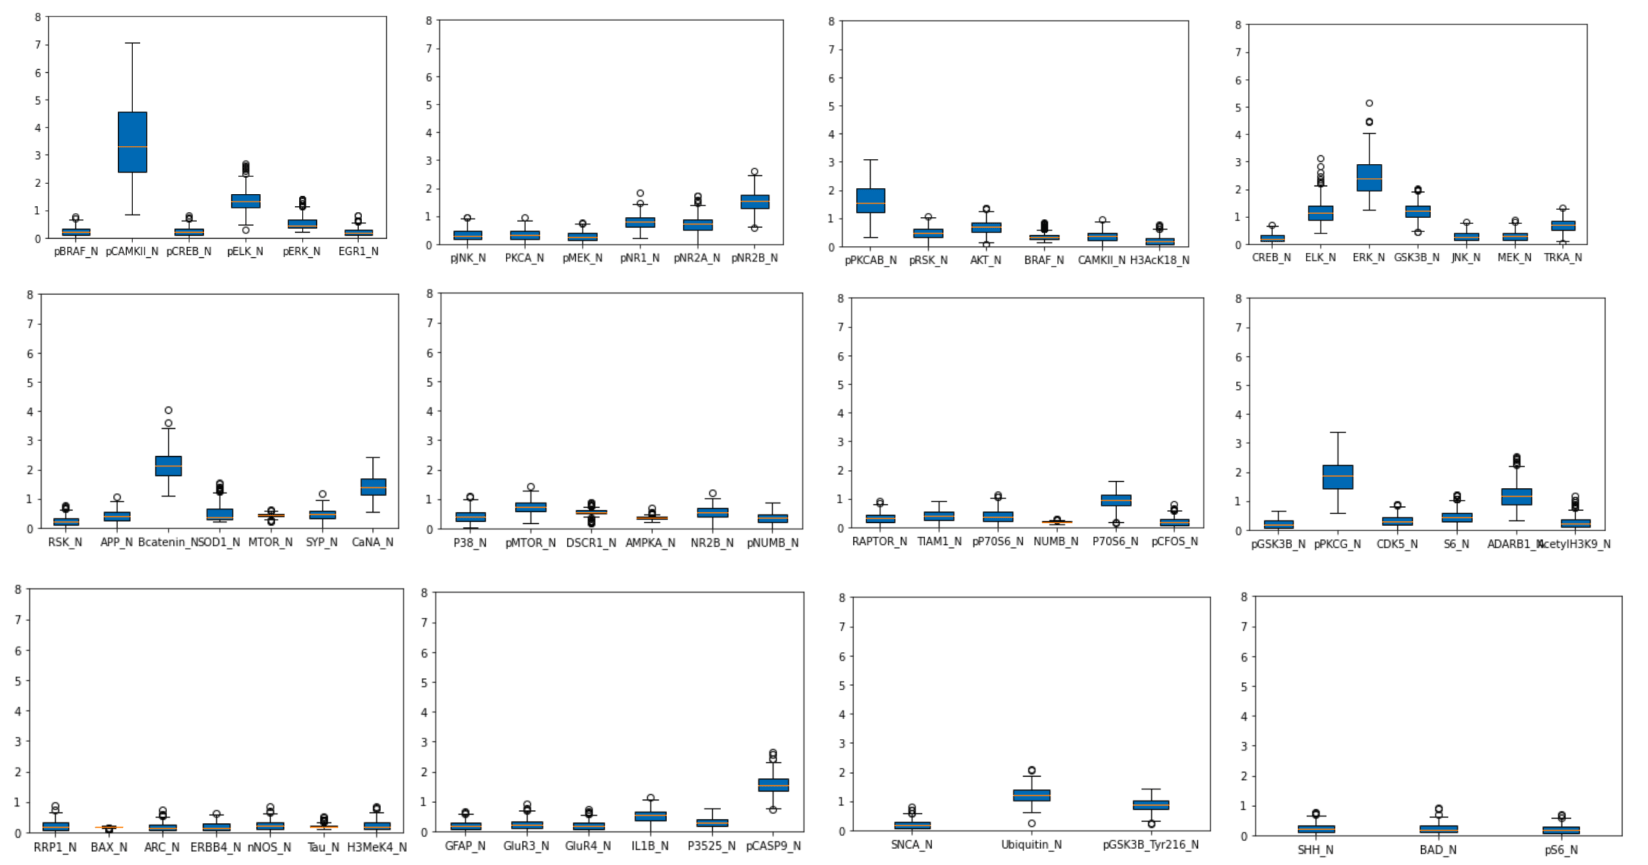

#### Missing data?

In [ ]:
np.any(expr_data.isna(), axis=1).sum()

No missing data, important to check because the algorithms that we will use require all the fields to have an actual value

#### Extreme values?

Detect unusual values for protein expression in each class

In [ ]:
t_SC_s = expr_data[expr_data['class']=='t-SC-s']
t_CS_s = expr_data[expr_data['class']=='t-CS-s']
t_CS_m = expr_data[expr_data['class']=='t-CS-m']
c_CS_s = expr_data[expr_data['class']=='c-CS-s']
c_SC_s = expr_data[expr_data['class']=='c-SC-s']
t_SC_m = expr_data[expr_data['class']=='t-SC-m']
c_CS_m = expr_data[expr_data['class']=='c-CS-m']
c_SC_m = expr_data[expr_data['class']=='c-SC-m']

In [ ]:
Q1 = t_SC_s.quantile(0.25)
Q3 = t_SC_s.quantile(0.75)
IQR = Q3 - Q1
t_SC_s_noout = t_SC_s[~((t_SC_s < (Q1 - 1.5 * IQR)) |(t_SC_s > (Q3 + 1.5 * IQR))).any(axis=1)]
t_SC_s_noout.shape
t_SC_s.shape

In [ ]:
Q1 = t_CS_s.quantile(0.25)
Q3 = t_CS_s.quantile(0.75)
IQR = Q3 - Q1
t_CS_s_noout = t_CS_s[~((t_CS_s < (Q1 - 1.5 * IQR)) |(t_CS_s > (Q3 + 1.5 * IQR))).any(axis=1)]
t_CS_s_noout.shape
t_CS_s.shape

In [ ]:
Q1 = t_CS_m.quantile(0.25)
Q3 = t_CS_m.quantile(0.75)
IQR = Q3 - Q1
t_CS_m_noout = t_CS_m[~((t_CS_m < (Q1 - 1.5 * IQR)) |(t_CS_m > (Q3 + 1.5 * IQR))).any(axis=1)]
t_CS_m_noout.shape
t_CS_m.shape

In [ ]:
Q1 = c_CS_s.quantile(0.25)
Q3 = c_CS_s.quantile(0.75)
IQR = Q3 - Q1
c_CS_s_noout = c_CS_s[~((c_CS_s < (Q1 - 1.5 * IQR)) |(c_CS_s > (Q3 + 1.5 * IQR))).any(axis=1)]
c_CS_s_noout.shape
c_CS_s.shape

In [ ]:
Q1 = c_SC_s.quantile(0.25)
Q3 = c_SC_s.quantile(0.75)
IQR = Q3 - Q1
c_SC_s_noout = c_SC_s[~((c_CS_s < (Q1 - 1.5 * IQR)) |(c_SC_s > (Q3 + 1.5 * IQR))).any(axis=1)]
c_SC_s_noout.shape
c_SC_s.shape

In [ ]:
Q1 = t_SC_m.quantile(0.25)
Q3 = t_SC_m.quantile(0.75)
IQR = Q3 - Q1
t_SC_m_noout = t_SC_m[~((t_SC_m < (Q1 - 1.5 * IQR)) |(t_SC_m > (Q3 + 1.5 * IQR))).any(axis=1)]
t_SC_m_noout.shape
t_SC_m.shape

In [ ]:
Q1 = c_CS_m.quantile(0.25)
Q3 = c_CS_m.quantile(0.75)
IQR = Q3 - Q1
c_CS_m_noout = c_CS_m[~((c_CS_m < (Q1 - 1.5 * IQR)) |(c_CS_m > (Q3 + 1.5 * IQR))).any(axis=1)]
c_CS_m_noout.shape
c_CS_m.shape

In [ ]:
Q1 = c_SC_m.quantile(0.25)
Q3 = c_SC_m.quantile(0.75)
IQR = Q3 - Q1
c_SC_m_noout = c_SC_m[~((c_SC_m < (Q1 - 1.5 * IQR)) |(c_SC_m > (Q3 + 1.5 * IQR))).any(axis=1)]
c_SC_m_noout.shape
c_SC_m.shape

In [ ]:
import warnings
warnings.filterwarnings('ignore')

t_SC_s_noout['class']='t-SC-s'
t_CS_s_noout['class']='t-CS-s'
t_SC_m_noout['class']='t-SC-m'
t_CS_m_noout['class']='t-CS-m'
c_CS_s_noout['class']='c-CS-s'
c_SC_s_noout['class']='c-SC-s'
c_CS_m_noout['class']='c-CS-m'
c_SC_m_noout['class']='c-SC-m'
frames = [t_SC_s_noout, t_CS_s_noout,c_CS_s_noout]
frames1 = [c_SC_s_noout, t_SC_m_noout,c_CS_m_noout]
frames2 = [c_SC_m_noout,t_CS_m_noout]
new_data = pd.concat([t_SC_s_noout,t_CS_s_noout,c_CS_s_noout])
new_data = pd.concat([c_SC_s_noout, t_SC_m_noout,c_CS_m_noout])
new_data = pd.concat([c_SC_m_noout,t_CS_m_noout])
new_data.shape

If the protein expression extreme values for each class are deleted, the dataset would become an high dimensional setting.

Doing clustering (k-means and hierarchical, either sensible to outliers) on this new dataset (without outliers), the performance of the clusters does not improve, meaning that they do not affect so much our analysis.

So we have not delete extreme values.

##### “Outliers are not necessarily a bad thing. These are just observations that are not following the same pattern as the other ones. But it can be the case that an outlier is very interesting. For example, if in a biological experiment, a rat is not dead whereas all others are, then it would be very interesting to understand why. This could lead to new scientific discoveries.  So, it is important to detect outliers.”
- Pierre Lafaye de Micheaux, Author and Statistician

#### Plot for protein expression distribution in each class
We see from the boxplot the **distribution** of the **quantitative variables** in **each class**

In [ ]:
t_SC_s = t_SC_s.drop(['class'], axis=1)
t_CS_s = t_CS_s.drop(['class'], axis=1)
t_CS_m = t_CS_m.drop(['class'], axis=1)
c_CS_s = c_CS_s.drop(['class'], axis=1)
c_SC_s = c_SC_s.drop(['class'], axis=1)
t_SC_m = t_SC_m.drop(['class'], axis=1)
c_CS_m = c_CS_m.drop(['class'], axis=1)
c_SC_m = c_SC_m.drop(['class'], axis=1)

In [ ]:
expr_data_t_CS_s = (expr_data[expr_data['class']=='t-CS-s'])
columns = expr_data_t_CS_s.columns.drop(['class'])
x_data = range(0, expr_data_t_CS_s.shape[0])
fig, ax = plt.subplots()
for column in columns:

    ax.plot(x_data, expr_data_t_CS_s[column], label=column)

ax.set_title('Expression t-CS-s')

ax.legend()

expr_data_t_CS_m  = expr_data[expr_data['class']=='t-CS-m']
columns = expr_data_t_CS_m.columns.drop(['class'])
x_data = range(0, expr_data_t_CS_m.shape[0])
fig, ax = plt.subplots()
for column in columns:

    ax.plot(x_data, expr_data_t_CS_m[column], label=column)

ax.set_title('Expression t-CS-m')

ax.legend()

expr_data_c_CS_s = (expr_data[expr_data['class']=='c-CS-s'])
columns = expr_data_c_CS_s.columns.drop(['class'])
x_data = range(0, expr_data_c_CS_s.shape[0])
fig, ax = plt.subplots()
for column in columns:
    ax.plot(x_data, expr_data_c_CS_s[column], label=column)

ax.set_title('Expression c-CS-s')

ax.legend()

expr_data_c_SC_s = (expr_data[expr_data['class']=='c-SC-s'])
columns = expr_data_c_SC_s.columns.drop(['class'])
x_data = range(0, expr_data_c_SC_s.shape[0])
fig, ax = plt.subplots()
for column in columns:

    ax.plot(x_data, expr_data_c_SC_s[column], label=column)

ax.set_title('Expression c-SC-s')

ax.legend()

expr_data_t_SC_m = (expr_data[expr_data['class']=='t-SC-m'])
columns = expr_data_t_SC_m.columns.drop(['class'])
x_data = range(0, expr_data_t_SC_m.shape[0])
fig, ax = plt.subplots()
for column in columns:

    ax.plot(x_data, expr_data_t_SC_m[column], label=column)

ax.set_title('Expression t-SC-m')

ax.legend()

expr_data_c_CS_m = (expr_data[expr_data['class']=='c-CS-m'])
columns = expr_data_c_CS_m.columns.drop(['class'])
x_data = range(0, expr_data_c_CS_m.shape[0])
fig, ax = plt.subplots()
for column in columns:

    ax.plot(x_data, expr_data_c_CS_m[column], label=column)

ax.set_title('Expression c-CS-m')

ax.legend()

expr_data_c_SC_m = (expr_data[expr_data['class']=='c-SC-m'])
columns = expr_data_c_SC_m.columns.drop(['class'])
x_data = range(0, expr_data_c_SC_m.shape[0])
fig, ax = plt.subplots()
for column in columns:

    ax.plot(x_data, expr_data_c_SC_m[column], label=column)

ax.set_title('Expression c-SC-m')

ax.legend()



#### Relationship class-features
See what are the important features for each class, this is done by training a classification model for each class against the other classes (**One vs All**), and doing feature selection.

To apply feature selection we have tried to apply **lasso regression**, but it's difficult to interpret the graph due to the high amount of features. 
**Best subset selection** also could have been an optimal solution to the selection of the features but it's computationally expensive, and the device doesn't manage to conclude it. 

So finally we have chosen the **forward selection** approach; although it's a greedy approach in which the choice of the optimal solution at each step could lead to a solution that not always is the global optimal solution (approach that does not reconsiders its choice)

Definition of the functions that we will use in forward feature selection

In [8]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def accuracy(y_pred, y_true):
    return (y_pred == y_true).sum() / y_pred.shape[0]

def get_evaluator(scorer):
    def evaluator(model, X, y, trained=False):
        if not trained:
            model = model.fit(X, y)
        score = scorer(model, X, y)
        return model, score
    return evaluator   

def get_cv_evaluator(scorer, cv=3):
    def evaluator(model, X, y, trained=False):            
        scores = cross_val_score(model, X, y, scoring=scorer, cv=cv)
        if not trained:
            model = model.fit(X, y)
        return model, np.mean(scores)
    
    return evaluator

def get_val_evaluator(scorer, val_size=0.1):
    def evaluator(model, X, y, trained=False):
        X_train_small, X_val, y_train_small, y_val = train_test_split(X, y, 
                                                                      test_size=val_size,
                                                                      random_state=0)
        
        if not trained:
            model = model.fit(X_train_small, y_train_small)
        score = scorer(model, X_val, y_val) 
        
        return model, score
    
    return evaluator

def forward_selection(Xtrain_pd, ytrain, Xtest_pd, ytest,
                      candidates_evaluator, candidates_argbest,
                      subsets_evaluator, subsets_argbest,       
                      test_evaluator=None, test_argbest=None,
                      candidates_scorer_name=None,  
                      subsets_scorer_name=None,     
                      verbose=True, weight_step3=0):   
    test_evaluator = subsets_evaluator if not test_evaluator else test_evaluator
    test_argbest = subsets_argbest if not test_argbest else test_argbest
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    subsets_test = []
    subsets_metric = []        
    subsets_best_features = [] 
    plt.figure()
    candidate_fig = plt.subplot(111) 
    num_evaluations = 0        
    
    selected_features = []
    all_features = Xtrain_pd.columns
    model = DummyRegressor()
    model, score = candidates_evaluator(model, Xtrain_pd[[]], ytrain)
    best_candidate_metric.append(score)
    subsets_best_features.append([])
    _ = candidate_fig.scatter([0], [score], color="b")
    _, score = subsets_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_metric.append(score)
    _, score = test_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_test.append(score)
    for dim in range(len(all_features)):
        candidate_metrics = [] 
        candidate_models = []  
        remaining_features = all_features.difference(selected_features)
        
        for new_column in remaining_features:
            Xtrain_sub = Xtrain_pd[selected_features+[new_column]].to_numpy()
            model = LogisticRegression(solver="newton-cg", penalty='none')
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
            
        _ = candidate_fig.scatter([Xtrain_sub.shape[-1]]*len(candidate_metrics), candidate_metrics,
                                  color="b")
        idx_best_candidate = candidates_argbest(candidate_metrics)
        selected_features.append(remaining_features[idx_best_candidate])
        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        best_features = selected_features.copy()
        subsets_best_features.append(best_features)

        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = Xtrain_pd[best_features].to_numpy()
        best_subset_Xtest = Xtest_pd[best_features].to_numpy()
        _, score = test_evaluator(best_subset_model, best_subset_Xtest, ytest, trained=True)
        subsets_test.append(score)
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        num_evaluations += weight_step3 
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim+1, dim+1, best_features))
            print("M{} subset score (3.): {}".format(dim+1, score))
        
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    if verbose:
        print("\n\nBest configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Total number of trained models:", num_evaluations)
    
    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
    _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
    candidate_fig.set_title(candidates_scorer_name)
    candidate_fig.legend()

    plt.figure()
    subsets_fig = plt.subplot(111)
    _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
    _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
    best_test_score_idx = test_argbest(subsets_test)
    _ = subsets_fig.plot(range(len(subsets_test)), subsets_test, label="Test scores")
    _ = subsets_fig.scatter(best_test_score_idx, subsets_test[best_test_score_idx],
                              marker='X', label="Best test score", color="y")
    subsets_fig.set_title(subsets_scorer_name)
    subsets_fig.legend()

#### ONE VS ALL Logistic regression

#### t-CS-m class

In [11]:
expr_data = pd.read_csv("train.csv")
expr_data['class'] = expr_data['class'].replace({'t-CS-m':1 ,'t-CS-s' : 0 , 'c-CS-s' : 0, 'c-SC-s' : 0, 'c-CS-m' : 0, 'c-SC-m':0, 't-SC-s' : 0, 't-SC-m' : 0})
from sklearn.model_selection import train_test_split
split_seed = 42
split_test_size = 0.2
X_full_feat = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'pS6_N', 'pCFOS_N',
       'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N']
X_full=expr_data[X_full_feat]
y=expr_data['c
X_full_train, X_full_test, y_train, y_test = train_test_split(X_full, y,
                                                    test_size=split_test_size, 
                                                    random_state=split_seed)
y

0      1
1      0
2      0
3      0
4      0
      ..
362    0
363    0
364    1
365    0
366    0
Name: class, Length: 367, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(solver="newton-cg", penalty='none') 
model.fit(X_full_train, y_train)                               
y_predict = model.predict(X_full_train)

In [ ]:
cv = 10
forward_selection(X_full_train, y_train, X_full_test, y_test,
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, 
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv)

#### t-CS-s class

In [ ]:
expr_data = pd.read_csv("train.csv")
expr_data['class'] = expr_data['class'].replace({'t-CS-m': 0 ,'t-CS-s' : 1 , 'c-CS-s' : 0, 'c-SC-s' : 0, 'c-CS-m' : 0, 'c-SC-m':0, 't-SC-s' : 0, 't-SC-m' : 0})
from sklearn.model_selection import train_test_split
split_seed = 42
split_test_size = 0.2
X_full_feat = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'pS6_N', 'pCFOS_N',
       'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N']
X_full=expr_data[X_full_feat]
y=expr_data['class']
X_full_train, X_full_test, y_train, y_test = train_test_split(X_full, y,
                                                    test_size=split_test_size, 
                                                    random_state=split_seed)

In [ ]:
forward_selection(X_full_train, y_train, X_full_test, y_test,
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, 
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv)

#### c-CS-s class

In [ ]:
expr_data = pd.read_csv("train.csv")
expr_data['class'] = expr_data['class'].replace({'t-CS-m': 0 ,'t-CS-s' : 0 , 'c-CS-s' : 1, 'c-SC-s' : 0, 'c-CS-m' : 0, 'c-SC-m':0, 't-SC-s' : 0, 't-SC-m' : 0})
from sklearn.model_selection import train_test_split
split_seed = 42
split_test_size = 0.2
X_full_feat = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'pS6_N', 'pCFOS_N',
       'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N']
X_full=expr_data[X_full_feat]
y=expr_data['class']
X_full_train, X_full_test, y_train, y_test = train_test_split(X_full, y,
                                                    test_size=split_test_size, 
                                                    random_state=split_seed)

In [ ]:
forward_selection(X_full_train, y_train, X_full_test, y_test,
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, 
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv)

#### c-SC-s class

In [ ]:
expr_data = pd.read_csv("train.csv")
expr_data['class'] = expr_data['class'].replace({'t-CS-m': 0 ,'t-CS-s' : 0 , 'c-CS-s' : 0, 'c-SC-s' : 1, 'c-CS-m' : 0, 'c-SC-m':0, 't-SC-s' : 0, 't-SC-m' : 0})
from sklearn.model_selection import train_test_split
split_seed = 42
split_test_size = 0.2
X_full_feat = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'pS6_N', 'pCFOS_N',
       'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N']
X_full=expr_data[X_full_feat]
y=expr_data['class']
X_full_train, X_full_test, y_train, y_test = train_test_split(X_full, y,
                                                    test_size=split_test_size, 
                                                    random_state=split_seed)

In [ ]:
forward_selection(X_full_train, y_train, X_full_test, y_test,
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, 
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv)

#### c-CS-m class

In [ ]:
expr_data = pd.read_csv("train.csv")
expr_data['class'] = expr_data['class'].replace({'t-CS-m': 0 ,'t-CS-s' : 0 , 'c-CS-s' : 0, 'c-SC-s' : 0, 'c-CS-m' : 1, 'c-SC-m':0, 't-SC-s' : 0, 't-SC-m' : 0})
from sklearn.model_selection import train_test_split
split_seed = 42
split_test_size = 0.2
X_full_feat = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'pS6_N', 'pCFOS_N',
       'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N']
X_full=expr_data[X_full_feat]
y=expr_data['class']
X_full_train, X_full_test, y_train, y_test = train_test_split(X_full, y,
                                                    test_size=split_test_size, 
                                                    random_state=split_seed)

In [ ]:
forward_selection(X_full_train, y_train, X_full_test, y_test,
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, 
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv)

#### c-SC-m class

In [ ]:
expr_data = pd.read_csv("train.csv")
expr_data['class'] = expr_data['class'].replace({'t-CS-m': 0 ,'t-CS-s' : 0 , 'c-CS-s' : 0, 'c-SC-s' : 0, 'c-CS-m' : 0, 'c-SC-m':1, 't-SC-s' : 0, 't-SC-m' : 0})
from sklearn.model_selection import train_test_split
split_seed = 42
split_test_size = 0.2
X_full_feat = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'pS6_N', 'pCFOS_N',
       'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N']
X_full=expr_data[X_full_feat]
y=expr_data['class']
X_full_train, X_full_test, y_train, y_test = train_test_split(X_full, y,
                                                    test_size=split_test_size, 
                                                    random_state=split_seed)

In [ ]:
forward_selection(X_full_train, y_train, X_full_test, y_test,
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, 
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv)

#### t-SC-s class

In [ ]:
expr_data = pd.read_csv("train.csv")
expr_data['class'] = expr_data['class'].replace({'t-CS-m': 0 ,'t-CS-s' : 0 , 'c-CS-s' : 0, 'c-SC-s' : 0, 'c-CS-m' : 0, 'c-SC-m':0, 't-SC-s' : 1, 't-SC-m' : 0})
from sklearn.model_selection import train_test_split
split_seed = 42
split_test_size = 0.2
X_full_feat = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'pS6_N', 'pCFOS_N',
       'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N']
X_full=expr_data[X_full_feat]
y=expr_data['class']
X_full_train, X_full_test, y_train, y_test = train_test_split(X_full, y,
                                                    test_size=split_test_size, 
                                                    random_state=split_seed)

In [ ]:
forward_selection(X_full_train, y_train, X_full_test, y_test,
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, 
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv)

#### t-SC-m class

In [ ]:
expr_data = pd.read_csv("train.csv")
expr_data['class'] = expr_data['class'].replace({'t-CS-m': 0 ,'t-CS-s' : 0 , 'c-CS-s' : 0, 'c-SC-s' : 0, 'c-CS-m' : 0, 'c-SC-m':0, 't-SC-s' : 0, 't-SC-m' : 1})
from sklearn.model_selection import train_test_split
split_seed = 42
split_test_size = 0.2
X_full_feat = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'pS6_N', 'pCFOS_N',
       'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N']
X_full=expr_data[X_full_feat]
y=expr_data['class']
X_full_train, X_full_test, y_train, y_test = train_test_split(X_full, y,
                                                    test_size=split_test_size, 
                                                    random_state=split_seed)

In [ ]:
forward_selection(X_full_train, y_train, X_full_test, y_test,
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, 
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv)

##### Summary classes and relative number and names of relevant features

**c-CS-s** (21) -> 'ERK_N', 'AKT_N', 'ADARB1_N', 'DYRK1A_N', 'SYP_N', 'AMPKA_N', 'APP_N', 'ARC_N', 'AcetylH3K9_N', 'BAX_N', 'BRAF_N', 'BAD_N', 'CDK5_N', 'pCAMKII_N', 'ELK_N', 'CaNA_N', 'GFAP_N', 'CREB_N', 'P38_N', 'Ubiquitin_N', 'BDNF_N'

**c-CS-m** (25) -> 'ADARB1_N', 'AKT_N', 'AMPKA_N', 'APP_N', 'ARC_N', 'AcetylH3K9_N', 'BAD_N', 'BAX_N', **'Bcatenin_N', 'NUMB_N'**, 'ELK_N', **'GSK3B_N'**, 'BDNF_N', 'DYRK1A_N', **'ITSN1_N', 'ERBB4_N','GluR4_N', 'H3AcK18_N', 'NR2A_N', 'MTOR_N'**, 'BRAF_N', **'CAMKII_N'**, 'CREB_N', 'CaNA_N', **'DSCR1_N'***

**c-SC-s** (11) -> 'AKT_N', 'DYRK1A_N', 'pPKCG_N', 'AcetylH3K9_N', 'CREB_N', 'ADARB1_N', 'ELK_N', 'Tau_N', 'CDK5_N', 'AMPKA_N', 'APP_N'

**c-SC-m** (7) -> **'BRAF_N', 'pCAMKII_N', 'NUMB_N', 'BDNF_N', 'pERK_N', 'pPKCAB_N', 'BAX_N'***

**t-CS-s** (11) -> 'DSCR1_N', 'ADARB1_N', 'pGSK3B_Tyr216_N', 'ARC_N', 'BRAF_N', 'BDNF_N', 'Bcatenin_N', 'NUMB_N', 'MTOR_N', 'APP_N', 'AMPKA_N'

**t-CS-m** (8) -> 'BRAF_N', 'NUMB_N', **'DYRK1A_N', 'pCAMKII_N'**, 'ARC_N', **'SNCA_N', 'CDK5_N', 'BAX_N'**

**t-SC-s** (28) -> 'pNR2B_N', 'Tau_N', 'NR2B_N', 'BAX_N', 'APP_N', 'GluR4_N', 'ADARB1_N', 'BAD_N', 'NR1_N', 'BDNF_N', 'EGR1_N', 'ELK_N', 'ARC_N', 'ERBB4_N', 'JNK_N', 'CDK5_N', 'H3AcK18_N', 'ERK_N', 'pCASP9_N', 'nNOS_N', 'GSK3B_N', 'P3525_N', 'pRSK_N', 'AKT_N', 'BRAF_N', 'pPKCG_N', 'CaNA_N', 'MTOR_N'

**t-SC-m** (10) -> 'Tau_N', 'pPKCG_N', **'pERK_N'**, 'AKT_N', **'AMPKA_N'**, 'APP_N', 'ADARB1_N', **'pCAMKII_N'**, 'BRAF_N', 'ARC_N'

Immediately by visual inspection of the results we see that the number of protein expressed is less in case in which there is the memantine treatment, except for the C-CS-s mice, in which the situation is inverted.

In bold there are the proteins present only in the treatment with memantine respect to saline injection.

From this scheme it's possible also to see proteins frequently coexpressed in a given class, we will check if there is a correlation between these proteins. 
- pCAMKII_N - BRAF_N
- pCAMKII_N - ARC_N
- AKT_N - ADARB1_N
- ELK_N - AKT_N
- AKT_N - CaNa_N
- BAX_N - BDNF_N

We will check the correlation also for the proteins' couples that in the boxplots of the distribution have similar expression values (v)
- 1 <= v <= 4 :   ERK_N - Bcatenin_N - pPKCG_N
- 0 < v <= 3 :   ELK_N - pNR2B_N - pPKCAB_N - pCASP9_N
- 0 < v <= 2 :   GSK3B_N - ADARB1_N - Ubiquitin_N
- 0 < v <= 1.5 :  TRKA_N- pRSK_N - AKT_N - ELK_N - SOD1_N - pERK_N - pMTOR_N - SYP_N - pGSK3B_N - pGSK3B_Tyr216_N

### Feature to feature relationships, collinearity?
Measurement of any statistical association between variables and commonly refers to the degree to which a pair of variables are  related. Now we look in general to the correlation between features without divided them in classes.

Use of **Spearman's rank correlation coefficient** that does not make any assumption on the normality of the data or linear convariance (like Pearson correlation coefficient) and is robust to outliers.

N.B. Of all the possible correlations reported previously, we have reported only those thas have been resulted statistically significant, we have reported as an example the method that we have followed and after an image with all the scatterplots

In [ ]:
from numpy import mean
from numpy import std
from matplotlib import pyplot

data1=expr_data['BAX_N']
data2=expr_data['BDNF_N']
#summarize
#print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
#print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
#pyplot.xlabel('BAX_N')
#pyplot.ylabel('BDNF_N')
#pyplot.title('BAX_N-BDNF_N')
#pyplot.scatter(data1, data2)
#pyplot.show()

from scipy import stats
rho, pval = stats.spearmanr(data1,data2)
#rho 
#pval

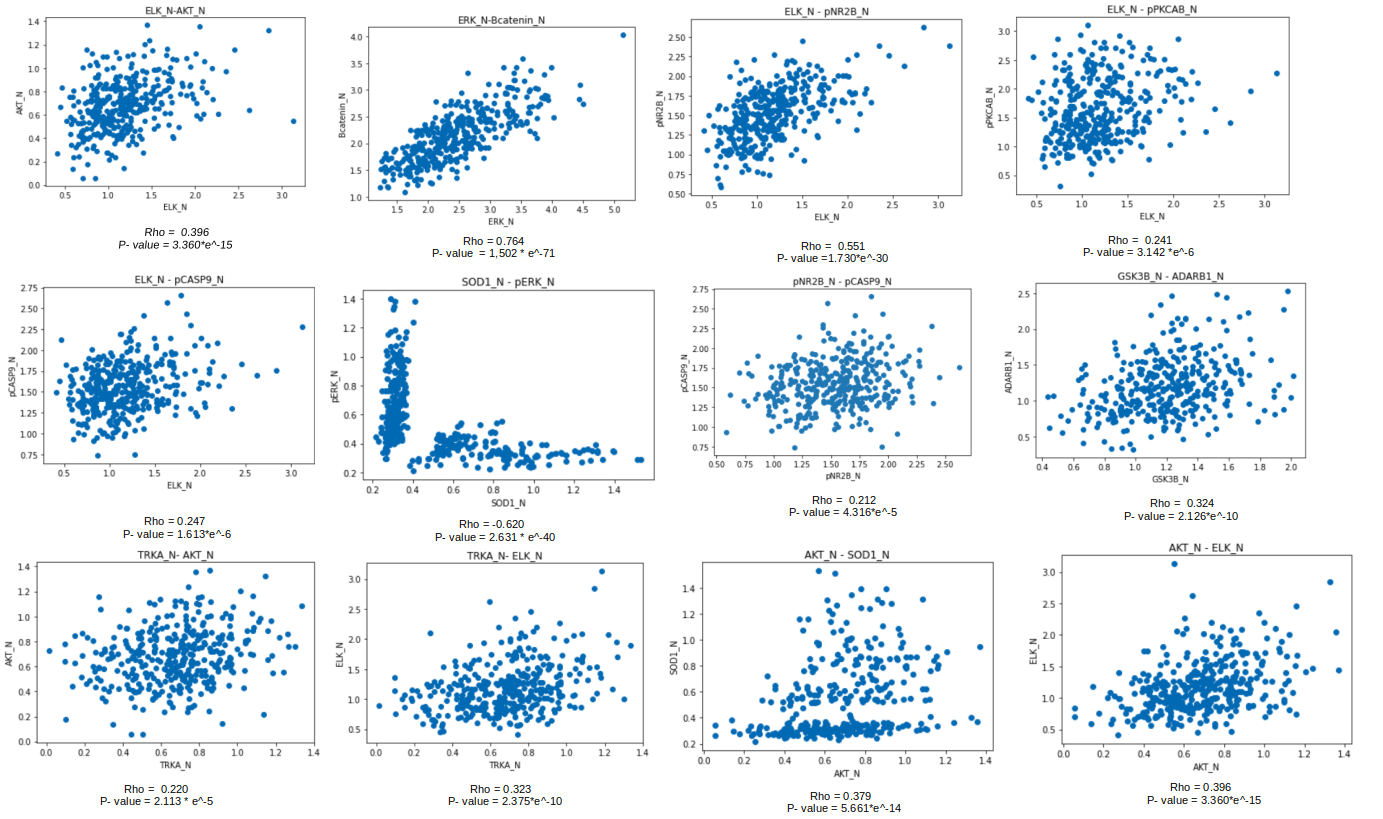

In [ ]:
sns.heatmap(expr_data.corr())

#### Unbalanced classes?
Important to see if the classes are unbalanced because otherwise we have to change the **treshold** of **classification** to avoid errors of our interest.
Important to check unbalanced also because in the next steps we have to split in test and train sets, and is necessary that both are **representative** of the **data**.

Look at the proportion of each class in our data.

In [ ]:
expr_data = pd.read_csv("train.csv")
expr_data['class'].value_counts()

In [ ]:
sns.countplot(x=expr_data['class'], data=expr_data, palette='hls') 

In [ ]:
count_t_SC_s = len(expr_data[expr_data['class']=='t-SC-s'])
count_t_CS_s = len(expr_data[expr_data['class']=='t-CS-s'])
count_t_CS_m = len(expr_data[expr_data['class']=='t-CS-m'])
count_c_CS_s = len(expr_data[expr_data['class']=='c-CS-s'])
count_c_SC_s = len(expr_data[expr_data['class']=='c-SC-s'])
count_t_SC_m = len(expr_data[expr_data['class']=='t-SC-m'])
count_c_CS_m = len(expr_data[expr_data['class']=='c-CS-m'])
count_c_SC_m = len(expr_data[expr_data['class']=='c-SC-m'])

pct_of_t_SC_s = count_t_SC_s/(count_t_SC_s+count_t_CS_s+count_t_CS_m+count_c_CS_s+count_c_SC_s+count_t_SC_m+count_c_CS_m+count_c_SC_m)
print("percentage of t-SC-s is", pct_of_t_SC_s*100)
pct_of_t_CS_s = count_t_CS_s/(count_t_SC_s+count_t_CS_s+count_t_CS_m+count_c_CS_s+count_c_SC_s+count_t_SC_m+count_c_CS_m+count_c_SC_m)
print("percentage of t-CS-s is", pct_of_t_CS_s*100)
pct_of_t_CS_m = count_t_CS_m/(count_t_SC_s+count_t_CS_s+count_t_CS_m+count_c_CS_s+count_c_SC_s+count_t_SC_m+count_c_CS_m+count_c_SC_m)
print("percentage of t-CS-m is", pct_of_t_CS_m*100)
pct_of_c_CS_s = count_c_CS_s/(count_t_SC_s+count_t_CS_s+count_t_CS_m+count_c_CS_s+count_c_SC_s+count_t_SC_m+count_c_CS_m+count_c_SC_m)
print("percentage of c-CS-s is", pct_of_c_CS_s*100)
pct_of_c_SC_s = count_c_SC_s/(count_t_SC_s+count_t_CS_s+count_t_CS_m+count_c_CS_s+count_c_SC_s+count_t_SC_m+count_c_CS_m+count_c_SC_m)
print("percentage of c-SC-s is", pct_of_c_SC_s*100)
pct_of_t_SC_m = count_t_SC_m/(count_t_SC_s+count_t_CS_s+count_t_CS_m+count_c_CS_s+count_c_SC_s+count_t_SC_m+count_c_CS_m+count_c_SC_m)
print("percentage of t-SC-m is", pct_of_t_SC_m*100)
pct_of_c_CS_m = count_c_CS_m/(count_t_SC_s+count_t_CS_s+count_t_CS_m+count_c_CS_s+count_c_SC_s+count_t_SC_m+count_c_CS_m+count_c_SC_m)
print("percentage of c-CS-m is", pct_of_c_CS_m*100)
pct_of_c_SC_m = count_c_SC_m/(count_t_SC_s+count_t_CS_s+count_t_CS_m+count_c_CS_s+count_c_SC_s+count_t_SC_m+count_c_CS_m+count_c_SC_m)
print("percentage of c-SC-m is", pct_of_c_SC_m*100)

Classes, overall, are **balanced**

#### Protein more expressed in each class
Protein expression can be grouped in mainly three groups 0-1 low expressed, 1-3 medium expressed and proteins highly expressed 3-5. In this case we see the protein more expressed for each class.

In [ ]:
expr_matrix = expr_data.groupby(expr_data['class']).mean()
expr_matrix.idxmax(axis=1)
expr_matrix.max(axis=1)

We can see a pattern between classes that represents learn context and classes non in learn context, in particular in the first case the protein more expressed seems to be pCAMKII_N instead in the second case NR2A_N

**Expression** of **each protein** for **all** the **classes** (y axis - expression, x -axis classes).
Analysis of the variance of expression among classes

One example on the method that we have used to graph the plots.

In [ ]:
expr_matrix = expr_data['DYRK1A_N'].groupby(expr_data['class']).mean()

x=expr_matrix.index
y=expr_matrix.values
  
#plt.fill_between( x, y, color="skyblue", alpha=0.2)
#plt.plot(x, y, color="Slateblue", alpha=0.6)

#plt.xlabel("Class")
#plt.ylabel("DYRK1A_N")

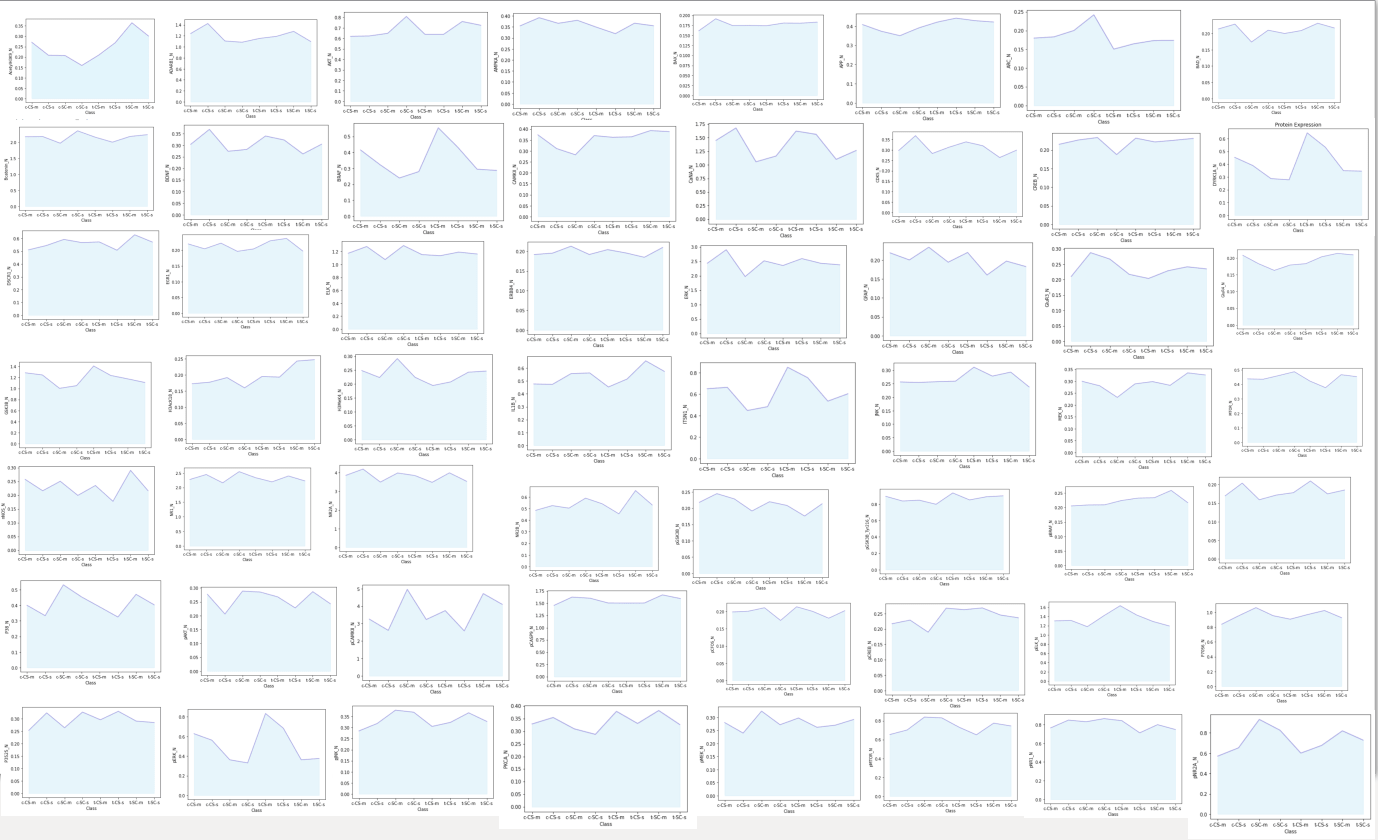

Through the plot for each protein we see that there are:
- Proteins that have an high variance among the classes (significant for a multiclass model)
- Proteins that do not change between classes 
- Proteins that change in expression only among some classes

#### Important proteins for each pair of biological meaningful classes
The research article illustrates a table in which there are group comparisons with biological relevance.

We have reported the features resulted important for the classification of each this pairwise biological meaningful classes.

In [ ]:
expr_data = pd.read_csv("train.csv")
t_SC_s = (expr_data[expr_data['class']=='t-SC-s'])
t_CS_s = (expr_data[expr_data['class']=='t-CS-s'])
t_CS_m = (expr_data[expr_data['class']=='t-CS-m'])
c_CS_s = (expr_data[expr_data['class']=='c-CS-s'])
c_SC_s = (expr_data[expr_data['class']=='c-SC-s'])
t_SC_m = (expr_data[expr_data['class']=='t-SC-m'])
c_CS_m = (expr_data[expr_data['class']=='c-CS-m'])
c_SC_m = (expr_data[expr_data['class']=='c-SC-m'])

frames_treat_DS=[t_CS_m, t_CS_s] 
treat_DS = pd.concat(frames_treat_DS)
frames_learn_contr=[c_CS_s, c_SC_s] 
learn_cont = pd.concat(frames_learn_contr)
frames_DS_contr = [c_CS_s, t_CS_s] 
DS_contr = pd.concat(frames_DS_contr)

Analysis of the important proteins that are activated by **memantine** in **learn context** (classify 't-CS-s'/'t-CS-m')

In [ ]:
treat_DS['class'] = treat_DS['class'].replace({'t-CS-m': 1 ,'t-CS-s' : 0})
from sklearn.model_selection import train_test_split
split_seed = 42
split_test_size = 0.2
X_full_feat = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'pS6_N', 'pCFOS_N',
       'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N']
X_full=treat_DS[X_full_feat]
y=treat_DS['class']
X_full_train, X_full_test, y_train, y_test = train_test_split(X_full, y,
                                                     test_size=split_test_size,
                                                    random_state=split_seed)

In [ ]:
forward_selection(X_full_train, y_train, X_full_test, y_test,
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, 
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv)

Analysis of the proteins activated in **learn context** and **not in learn context**, in control (classify 'c-CS-s'/'c-SC-s')

In [ ]:
learn_cont['class'] = learn_cont['class'].replace({'c-CS-s' : 0, 'c-SC-s' : 1})
from sklearn.model_selection import train_test_split
split_seed = 42
split_test_size = 0.2
X_full_feat = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'pS6_N', 'pCFOS_N',
       'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N']
X_full=learn_cont[X_full_feat]
y=learn_cont['class']
X_full_train, X_full_test, y_train, y_test = train_test_split(X_full, y,
                                                    test_size=split_test_size, 
                                                    random_state=split_seed)

In [ ]:
cv=10
forward_selection(X_full_train, y_train, X_full_test, y_test,
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, 
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv)

Analysis of the proteins activated in **control** vs **mice** with **Down Syndrome** in **learn context** (c-CS-s/t-CS-s)

In [ ]:
DS_contr['class'] = DS_contr['class'].replace({'c-CS-s' : 0,'t-CS-s' : 1})
from sklearn.model_selection import train_test_split
split_seed = 42
split_test_size = 0.2
X_full_feat = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'pS6_N', 'pCFOS_N',
       'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N']
X_full=DS_contr[X_full_feat]
y=DS_contr['class']
X_full_train, X_full_test, y_train, y_test = train_test_split(X_full, y,
                                                    test_size=split_test_size, 
                                                    random_state=split_seed)

In [ ]:
forward_selection(X_full_train, y_train, X_full_test, y_test,
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, 
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv)

Analysis Protein Expression in **Control mice** and **mice** with **Down Syndrome**

In [ ]:
expr_data['class'] = expr_data['class'].replace({'t-CS-m': 1 ,'t-CS-s' : 1 , 'c-CS-s' : 0, 'c-SC-s' : 0, 'c-CS-m' : 0, 'c-SC-m':0, 't-SC-s' : 1, 't-SC-m' : 1})
from sklearn.model_selection import train_test_split
split_seed = 42
split_test_size = 0.2
X_full_feat = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'pS6_N', 'pCFOS_N',
       'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N']
X_full=expr_data[X_full_feat]
y=expr_data['class']
X_full_train, X_full_test, y_train, y_test = train_test_split(X_full, y,
                                                    test_size=split_test_size, 
                                                    random_state=split_seed)

In [ ]:
forward_selection(X_full_train, y_train, X_full_test, y_test,
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, 
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv)

Important features detected (**number** and **names**):

t-CS-s/t-CS-m (13) -> 'BRAF_N', 'PSD95_N', 'AcetylH3K9_N', 'ARC_N', 'BAD_N', 'BDNF_N', 'CAMKII_N', 'DYRK1A_N', 'BAX_N', 'GluR3_N', 'NUMB_N', 'pCAMKII_N', 'ADARB1_N'

c-CS-s/c-SC-s (61) -> 'pERK_N', 'AMPKA_N', 'ADARB1_N', 'AKT_N', 'APP_N', 'ARC_N', 'AcetylH3K9_N', 'BAD_N', 'BAX_N', 'BDNF_N', 'BRAF_N', 'Bcatenin_N', 'CAMKII_N', 'CDK5_N', 'CREB_N', 'CaNA_N', 'DSCR1_N', 'DYRK1A_N', 'EGR1_N', 'ELK_N', 'ERBB4_N', 'ERK_N', 'GFAP_N', 'GSK3B_N', 'GluR3_N', 'GluR4_N', 'H3AcK18_N', 'H3MeK4_N', 'IL1B_N', 'ITSN1_N', 'JNK_N', 'MEK_N', 'MTOR_N', 'NR1_N', 'NR2A_N', 'NR2B_N', 'NUMB_N', 'P3525_N', 'P38_N', 'P70S6_N', 'PKCA_N', 'PSD95_N', 'RAPTOR_N', 'RRP1_N', 'RSK_N', 'S6_N', 'SHH_N', 'SNCA_N', 'SYP_N', 'TIAM1_N', 'TRKA_N', 'Tau_N', 'Ubiquitin_N', 'nNOS_N', 'pAKT_N', 'pBRAF_N', 'pCAMKII_N', 'pCASP9_N', 'pCFOS_N', 'pCREB_N', 'pELK_N'

c-CS-s/t-CS-s (15) -> ''DYRK1A_N', 'AMPKA_N', 'ADARB1_N', 'AKT_N', 'APP_N', 'ARC_N', 'AcetylH3K9_N', 'BAD_N', 'BAX_N', 'BDNF_N', 'BRAF_N', 'Bcatenin_N', 'CAMKII_N', 'CDK5_N', 'CREB_N'

All t-/ All c- (7) -> 'Tau_N', 'DYRK1A_N', 'ELK_N', 'pERK_N', 'AKT_N', 'ERK_N', 'NR1_N'

From these analysis we see that to explain the effect of memantine on DS mice, or the difference between control mice and Down Syndrome mice, only a small portion of proteins are needed! 

### Clustering 
Exploratory analysis, search for **structures** in the **data** that allow samples from different classes to be easily identified, compare the performance of different clustering algorithms

From the cluster analysis we see that it's possible to separate the classes, but the clusters are not well defined

In [ ]:
X_feat = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'pS6_N', 'pCFOS_N',
       'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N']
y_class = []
len(X_feat)

In [ ]:
expr_data = pd.read_csv("train.csv")
expr_data['class'] = expr_data['class'].replace({'t-CS-m':0 ,'t-CS-s' : 1 , 'c-CS-s' : 2, 'c-SC-s' : 3, 'c-CS-m' : 4, 'c-SC-m':5, 't-SC-s' : 6, 't-SC-m' : 7})
X = expr_data[X_feat]
X.shape
X = X.to_numpy()
y = expr_data['class']

#### PCA

We can try to have a first idea on how samples are organized by visualizing how they are distributed in the space. In order to do that (we can only visualize 3 dimensions) we have to reduce the number of features. 
We can use PCA to convert the original dataset features (76) into 3 new features (NB: not a subset of the most important features, but new ones) and use them as coordinates of a 3D space.
PCA is important to remove redundancy.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X = X.reshape(-1, 4*19)
X_prj = pca.fit_transform(X)
X_prj.shape

In [ ]:
y = np.array(y)
y = y.astype(int)
X = X.astype(float)

In [ ]:
def plot3d(X, labels):
    from mpl_toolkits.mplot3d import Axes3D
    
    pca = PCA(n_components=3)
    X = X.reshape(-1, 4*19)
    X = pca.fit_transform(X)
    
    unique_labels = np.unique(labels)
    labels = labels.copy()
    labels += np.abs(unique_labels.min())
    nlabels = len(unique_labels)
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    col = ('tab10' if nlabels <= 10 else 
          ('tab20' if nlabels <= 20 else
           'hsv'))
    cmap = plt.cm.get_cmap(col)
    smap = cm.ScalarMappable(
              norm=mcolors.Normalize(unique_labels.min(), unique_labels.max()+1), 
              cmap=cmap)
    ax.scatter(xs=X_prj[:, 0], ys=X_prj[:, 1], zs=X_prj[:, 2], c=labels, cmap=cmap)
    plt.colorbar(mappable=smap, label='digit label', ticks=range(nlabels))
    
plot3d(X, labels=y)

By inspecting the graph we can see that:
- Images (in this case points in the 3D space) of the same class seems not to aggregate in closer regions of the space
- Different classes/cluster seem not well separated

Structures in the data are not very well defined, although seems that it's hard to find clusters in the data, we have evaluated the performance of different clustering algorithm in the data, to see if further informations could be retrieved.

#### Hierarchical clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, metric='euclidean', method='ward')
print("X.shape", X.shape)

In [ ]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(Z=None, model=None, X=None, **kwargs):
    annotate_above = kwargs.pop('annotate_above', 0)
    
    if Z is None:
        if hasattr(model, 'distances_') and model.distances_ is not None:
        
            counts = np.zeros(model.children_.shape[0])
            n_samples = len(model.labels_)
            for i, merge in enumerate(model.children_):
                current_count = 0
                for child_idx in merge:
                    if child_idx < n_samples:
                        current_count += 1  
                    else:
                        current_count += counts[child_idx - n_samples]
                counts[i] = current_count

            Z = np.column_stack([model.children_, model.distances_,
                                              counts]).astype(float)
        else:
            Z = linkage(X, method=model.linkage, metric=model.affinity)
    
    if 'n_clusters' in kwargs:
        n_clusters = kwargs.pop('n_clusters')
        kwargs['color_threshold'] = Z[-n_clusters, 2] + 1e-6
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    ddata = dendrogram(Z, ax=ax, **kwargs) 
    
    for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        nid = np.where(Z[:,2] == y)[0][0]
        if y > annotate_above:
            plt.plot(x, y, 'o', c=c)
            plt.annotate(str(nid-Z.shape[0]), (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')
    if kwargs['color_threshold']:
        plt.axhline(y=kwargs['color_threshold'], c='k')
    
    return fig, ax

Hierarchical clustering: evaluate usage of different **linkage methods**

In [ ]:
methods = ['single', 'average', 'complete', 'centroid', 'ward']

for method in methods:
    Z = linkage(X, metric='euclidean', method=method)
    fig, ax = plot_dendrogram(Z=Z, X=X, truncate_mode='lastp', 
                              p=100, n_clusters=8)
    ax.set_title(method)

The linkages that do not perform well are centroid linkage, as we expect, because suffers of inversion. Single linkage is not very good because points are all very close to each other, and reaches only few clusters.

**Average** and **complete** are those perform better.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
distance_threshold=None
n_clusters=8

model = AgglomerativeClustering(n_clusters=n_clusters, 
                                distance_threshold=distance_threshold, 
                                affinity='euclidean', linkage='complete')

y_predict = model.fit_predict(X)

plot3d(X, labels=y_predict)
plot_dendrogram(model=model, X=X_prj, truncate_mode='lastp', p=100, 
                n_clusters=n_clusters, 
                color_threshold=distance_threshold)
y_predict

The clusters found with hierarchical clustering algorithm, seem quiet  well defined from the 3d plot.

#### Clustering metrics 

In [ ]:
def similarity_mat(X, metric):
    dist_mat = pairwise_distances(X, metric=metric)
    min_dist, max_dist = dist_mat.min(), dist_mat.max()
    
    sim_mat = 1 - (dist_mat - min_dist) / (max_dist - min_dist)
    return sim_mat

In [ ]:
def sorted_sim(sim, y_pred):
    idx_sorted = np.argsort(y_pred)
    sim = sim[idx_sorted]
    sim = sim[:, idx_sorted]
    return sim

def plot_sorted_sim(sim, y_pred):
    sim = sorted_sim(sim, y_pred)
    fig, ax = plt.subplots(figsize=(40,30))  
    ax = sns.heatmap(sim, ax=ax)
    ax.set_yticks([]) 
    ax.set_xticks([])

**Similarity matrix** for Hierarchical clustering

In [ ]:
from sklearn.metrics import pairwise_distances
sim = similarity_mat(X, 'euclidean')
plot_sorted_sim(sim, y_predict)

From the similarity matrix we see that clusters arrange around the main diagonal

In [ ]:
def get_Ncounts(y_predict, y_true, k, j=None):
    N = y_true.shape[0]
    Nk_mask = y_predict == k
    Nk = Nk_mask.sum()
    Nj, Nkj = None, None
    if j is not None:
        Nj_mask = y_true == j
        Nj = Nj_mask.sum()
        Nkj = np.logical_and(Nj_mask, Nk_mask).sum()
    return N, Nk, Nj, Nkj

def precision(y_predict, y_true, k, j):
    N, Nk, Nj, Nkj = get_Ncounts(y_predict, y_true, k, j)
    return Nkj / (Nk + 1e-8)
    
def recall(y_predict, y_true, k, j):
    N, Nk, Nj, Nkj = get_Ncounts(y_predict, y_true, k, j)
    return Nkj / (Nj + 1e-8)

def F(y_predict, y_true, k, j):
    p = precision(y_predict, y_true, k, j)
    r = recall(y_predict, y_true, k, j)
    return (2*p*r) / (p+r)

def purity(y_predict, y_true, k):
    cls = np.unique(y_true)
    prec = [precision(y_predict, y_true, k, j) for j in cls]
    return max(prec)

def tot_purity(y_predict, y_true):
    N = y_true.shape[0]
    nc = len(np.unique(y_true))
    p = 0
    for k in range(nc):
        N, Nk, _, _ = get_Ncounts(y_predict, y_true, k)
        pk = purity(y_predict, y_true, k)
        p += (Nk / N) * pk
    return p

In [ ]:
from sklearn.preprocessing import normalize
def incidence_mat(y_pred):
    npoints = y_pred.shape[0]
    mat = np.zeros([npoints, npoints])
    clusters = np.unique(y_pred)
    nclusters = clusters.shape[0]
    
    for i in range(nclusters):
        sample_idx = np.where(y_pred == i)
        idx = np.meshgrid(sample_idx, sample_idx)
        mat[idx[0].reshape(-1), idx[1].reshape(-1)] = 1
        
    return mat
def correlation(X, y_pred, metric):
    inc = incidence_mat(y_pred)
    sim = similarity_mat(X, metric)
    inc = normalize(inc.reshape(1, -1))
    sim = normalize(sim.reshape(1, -1))
    corr = (inc @ sim.T)
    return corr[0,0]   

In [ ]:
cor = correlation(X, y_predict, 'euclidean')
print('Hierarchical correlation', cor )
y_rand = np.random.randint(0, 10, y.shape[0])
rand_cor = correlation(X, y_rand, 'euclidean')
print('Random correlation', rand_cor)

In [ ]:
pur = tot_purity(y_predict, y)
print('Hierarchical purity', pur)
rand_pur=tot_purity(y_rand, y)
print('Random purity', rand_pur)

We do not record a very high metric, and also this metric is not very dissimilar to a random clustering (to have a difference the purity of a random clustering should be 1/10 the purity found with the algortihm)

The incapacity to find clusters could be dued to the presence of proteins that are not important to differentiate the classes (as we see in EDA) so it's important to identify proteins whose  levels are significantly different between classes, and keep only them in the dataset. 
So probably in some classes there is not enough variance such that the clusters are well separated. 

#### K-means

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=8, init='random', random_state=0)             
y_predict = model.fit_predict(X)
print("Kmeans purity", tot_purity(y_predict, y))
cor = correlation(X, y_predict, 'euclidean')
print('Kmeans correlation ', cor)
plot3d(X, labels=y_predict)

Comparison of the algorithms using the metrics treated during the course

In [ ]:
#K-Means
model = KMeans(n_clusters=8, init='random', random_state=0)             
print("Random Kmeans purity", tot_purity(model.fit_predict(X), y))

# K-Means++
model = KMeans(n_clusters=8, init='k-means++', random_state=0)             
print("Kmeans++ purity", tot_purity(model.fit_predict(X), y))

# Hierarchical
hmodel = AgglomerativeClustering(n_clusters=8, 
                                distance_threshold=distance_threshold, 
                                affinity='euclidean', linkage='complete')
y_predict = hmodel.fit_predict(X)
centroids = np.stack([X[y_predict == k].mean(0) for k in range(8)])
model = KMeans(n_clusters=8, init=centroids, n_init=1, random_state=0)             
print("Hierarchical+Kmeans purity", tot_purity(model.fit_predict(X), y))

#### DBSCAN algorithm

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
def make_scorer(metric):
    def scorer(estimator, X, y):
        y_pred = estimator.fit_predict(X)
        return metric(y_pred, y)
    return scorer

#Search for the best number of Epsilon and MinPts with cross validation
from sklearn.model_selection import GridSearchCV
params = {'eps': [20], 'min_samples': range(5,20)}
cv = GridSearchCV(DBSCAN(), params, scoring=make_scorer(tot_purity), cv=3)
cv = cv.fit(X, y)
print(cv.best_params_)
print("CV score", tot_purity(cv.best_estimator_.fit_predict(X), y))
print("DBSCAN purity", tot_purity(y_predict, y))
pd.DataFrame(cv.cv_results_)

We see that neither clusters algorithms is able to catch the clusters in the data, probably is better to unify similar classes into one class to enhance the variance between groups.

Now we have tried another algorithm that is DBSCAN that doesn't require k in advance. Also DBSCAN doesn't perform very well.

Although we have not reached a good clustering we can evaluate the performance of the different clustering methods on the base
of the internal metrics purity i.e. number of observations belonging to the cluster that belong to the same class divided by
all the number of observations in the cluster

| Algorithm           |Purity
:---------------------|---------------------
| Hierarchical        | 0.3351498636618552
| DBSCAN              | 0.3351498636618552
| Random Kmeans       | 0.4005449590380675
| Kmeans++            | 0.3896457764790453
| Hierarchical+Kmeans | 0.3297002723881621

The algorithm that **performs better** in separate the different observations in the different clusters is **K-means**

As we have seen in exploratory analysis, the deletion of outliers won't improve the clustering, infact k-means and hierarchical clustering (either very sensible to noise) have about the same performance or perform better to DBSCAN (robust to outliers)

#### Biological interpretation

From the article we have seen that there are pair of classes that surely from a **biological interpretation** shows differential characteristics, we try to inspect with clustering to see if in the observations belonging to these classes there is enough variance to help the clustering algorithm to find patterns in the data. 

Given the eight classes of mice, there are 28 possible pairwise comparisons but only a subset of these are biologically meaningful. We concentrate on only some meaningful of these two-comparisons.

Example see if clustering can be found between **t-SC-m and t-SC-s**. 
The difference between the two condition measures the effects of memantine on trisomy baseline.

In [ ]:
expr_data = pd.read_csv("train.csv")
expr_data1 = expr_data[expr_data['class']=='t-SC-m']
expr_data2 = expr_data[expr_data['class']=='t-SC-s']
frames=[expr_data1, expr_data2]
expr_data3 = pd.concat(frames, axis=0)
X = expr_data3[X_feat]
X = X.to_numpy()
y = expr_data3['class']

In [ ]:
y = expr_data3['class'].replace({'t-SC-m':0 ,'t-SC-s':1})
expr_data3.shape
X.shape

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X = X.reshape(-1, 4*19)
X_prj = pca.fit_transform(X)
X_prj.shape

In [ ]:
def plot3d(X, labels):
    from mpl_toolkits.mplot3d import Axes3D
    
    pca = PCA(n_components=3)
    X = X.reshape(-1, 8*8)
    X = pca.fit_transform(X)
    
    unique_labels = np.unique(labels)
    labels = labels.copy()
    labels += np.abs(unique_labels.min())
    nlabels = len(unique_labels)
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    col = ('tab10' if nlabels <= 10 else 
          ('tab20' if nlabels <= 20 else
           'hsv'))
    cmap = plt.cm.get_cmap(col)
    smap = cm.ScalarMappable(
              norm=mcolors.Normalize(unique_labels.min(), unique_labels.max()+1), 
              cmap=cmap)
    ax.scatter(xs=X_prj[:, 0], ys=X_prj[:, 1], zs=X_prj[:, 2], c=labels, cmap=cmap)
    plt.colorbar(mappable=smap, label='digit label', ticks=range(nlabels))
    
plot3d(X, labels=y)

##### Hierarchical clustering

In [ ]:
n_clusters=2

model = AgglomerativeClustering(n_clusters=n_clusters, 
                                distance_threshold=distance_threshold, 
                                affinity='euclidean', linkage='complete')

y_predict = model.fit_predict(X)

In [ ]:
pur = tot_purity(y_predict, y)
print('Hierarchical purity', pur)
y_rand = np.random.randint(0, 10, y.shape[0])
rand_pur = tot_purity(y_rand, y)
print('Random purity', rand_pur)

##### K-means

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, init='random', random_state=0)    

y_predict = model.fit_predict(X)
print("Kmeans purity", tot_purity(y_predict, y))

rand_pur = tot_purity(y_rand, y)
print('Random purity', rand_pur)

So finally we reach the conclusion that the clustering algorithms do not work well because of low variance between the classes.
Infact in this last part when we look to two classes, that surely from a biological interpretation differ, because highly variant, metrics of the algorithm improves and random metric is 1/5 the metric computed with the y predicted. 
But the result of clustering is still not optimal! There could be different explanations to these:
- From EDA, we have seen that there are features high correlated -> High redundancy!
- From EDA, we have seen that there some features do not change them expression value among classes

## 2. CLASSIFICATION: the aim is to find a model that is able to classify mice in the 8 different classes. Steps:
I). Feature selection

II). Compare different classification algorithms

III). Test the best algorithm on the test set 

N.B. Remember to delete the SOD1 feature in the training, because there isn't in the test set

In [ ]:
expr_data = pd.read_csv("train.csv")
expr_data['class'] = expr_data['class'].replace({'t-CS-m':0 ,'t-CS-s' : 1 , 'c-CS-s' : 2, 'c-SC-s' : 3, 'c-CS-m' : 4, 'c-SC-m':5, 't-SC-s' : 6, 't-SC-m' : 7})
from sklearn.model_selection import train_test_split
split_seed = 42
split_test_size = 0.2
X_full_feat = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'pS6_N', 'pCFOS_N',
       'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N'] 
X_full=expr_data[X_full_feat]
y=expr_data['class']
X_full_train, X_full_test, y_train, y_test = train_test_split(X_full, y,
                                                    test_size=split_test_size, 
                                                    random_state=split_seed)

#### Why not to perform the z-test to check the statistical significance of the variables in substitution to feature selection?
We can perform the z-test on the multiple logistic regression (with all the parameters), but this is not very meaningful to check the significant variables in the model. We have tried, but for almost all the variables we fail to reject H0. 

This is due to the high number of parameters, that leads to a situation of collinearity in which two or more predictors are related to one another so it's difficult to determine how each one separately is associated with a given class. As a result in presence of collinearity, the power of the hypotesis test is reduced.

#### Forward feature selection
**Best subset selection** due to the high number of features, gives a memory error. Although it could have been better than forward feature selection ( that is a greedy approach); this choice comes from the fact that best subset selection requires more computational steps that on this device are not supported.

Feature selection has been done with **forward feature selection** and the result has been double checked with the result of **lasso regression** (graphic of the shrinkage)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def accuracy(y_pred, y_true):
    return (y_pred == y_true).sum() / y_pred.shape[0]

def get_evaluator(scorer):
    def evaluator(model, X, y, trained=False):
        if not trained:
            model = model.fit(X, y)
        score = scorer(model, X, y)
        return model, score
    return evaluator   

def get_cv_evaluator(scorer, cv=3):
    def evaluator(model, X, y, trained=False):            
        scores = cross_val_score(model, X, y, scoring=scorer, cv=cv)
        if not trained:
            model = model.fit(X, y)
        return model, np.mean(scores)
    
    return evaluator

def get_val_evaluator(scorer, val_size=0.1):
    def evaluator(model, X, y, trained=False):
        X_train_small, X_val, y_train_small, y_val = train_test_split(X, y, 
                                                                      test_size=val_size,
                                                                      random_state=0)
        
        if not trained:
            model = model.fit(X_train_small, y_train_small)
        score = scorer(model, X_val, y_val) 
        
        return model, score
    
    return evaluator

def forward_selection(Xtrain_pd, ytrain, Xtest_pd, ytest,
                      candidates_evaluator, candidates_argbest,
                      subsets_evaluator, subsets_argbest,       
                      test_evaluator=None, test_argbest=None,
                      candidates_scorer_name=None,  
                      subsets_scorer_name=None,     
                      verbose=True, weight_step3=0):   
    test_evaluator = subsets_evaluator if not test_evaluator else test_evaluator
    test_argbest = subsets_argbest if not test_argbest else test_argbest
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    subsets_test = []
    subsets_metric = []        
    subsets_best_features = [] 
    plt.figure()
    candidate_fig = plt.subplot(111) 
    num_evaluations = 0        
    
    selected_features = []
    all_features = Xtrain_pd.columns
    model = DummyRegressor()
    model, score = candidates_evaluator(model, Xtrain_pd[[]], ytrain)
    best_candidate_metric.append(score)
    subsets_best_features.append([])
    _ = candidate_fig.scatter([0], [score], color="b")
    _, score = subsets_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_metric.append(score)
    _, score = test_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_test.append(score)
    for dim in range(len(all_features)):
        candidate_metrics = [] 
        candidate_models = []  
        remaining_features = all_features.difference(selected_features)
        
        for new_column in remaining_features:
            Xtrain_sub = Xtrain_pd[selected_features+[new_column]].to_numpy()
            model = LogisticRegression(solver="newton-cg", penalty='none')
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
            
        _ = candidate_fig.scatter([Xtrain_sub.shape[-1]]*len(candidate_metrics), candidate_metrics,
                                  color="b")
        idx_best_candidate = candidates_argbest(candidate_metrics)
        selected_features.append(remaining_features[idx_best_candidate])
        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        best_features = selected_features.copy()
        subsets_best_features.append(best_features)

        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = Xtrain_pd[best_features].to_numpy()
        best_subset_Xtest = Xtest_pd[best_features].to_numpy()
        _, score = test_evaluator(best_subset_model, best_subset_Xtest, ytest, trained=True)
        subsets_test.append(score)
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        num_evaluations += weight_step3 
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim+1, dim+1, best_features))
            print("M{} subset score (3.): {}".format(dim+1, score))
        
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    if verbose:
        print("\n\nBest configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Total number of trained models:", num_evaluations)
    
    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
    _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
    candidate_fig.set_title(candidates_scorer_name)
    candidate_fig.legend()

    plt.figure()
    subsets_fig = plt.subplot(111)
    _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
    _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
    best_test_score_idx = test_argbest(subsets_test)
    _ = subsets_fig.plot(range(len(subsets_test)), subsets_test, label="Test scores")
    _ = subsets_fig.scatter(best_test_score_idx, subsets_test[best_test_score_idx],
                              marker='X', label="Best test score", color="y")
    subsets_fig.set_title(subsets_scorer_name)
    subsets_fig.legend()

In [ ]:
cv=10
forward_selection(X_full_train, y_train, X_full_test, y_test,
                  get_evaluator(make_scorer(accuracy)), np.argmax,
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, 
                  get_evaluator(make_scorer(accuracy)), np.argmax,
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv)

Best model has **10 features**:

'BRAF_N', 'pPKCG_N', 'pCAMKII_N', 'pERK_N', 'NUMB_N', 'AMPKA_N', 'Tau_N', 'BAX_N', 'CaNA_N', 'DSCR1_N'

#### Lasso logistic regression
**Standardization** is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In this case, infact, prior to apply logistic regression with l1 regularizer, we standardize the independent variable x

In [ ]:
C_vals = np.linspace(1e-4, 0.5, 100)
betas = []

from sklearn import preprocessing
X_std = preprocessing.scale(X_full_train)

for C in C_vals:
    model = LogisticRegression(solver='saga', penalty='l1', C=C, multi_class='multinomial')
    model.fit(X_std, y_train)
    beta = model.coef_.reshape(-1)
    betas.append(beta)
betas = np.stack(betas, axis=1) 

for beta, name in zip(betas, X_full_feat):
    plt.plot(C_vals, beta, label=name)
plt.legend()
plt.xlabel("C=1/lambda")
plt.ylabel("beta")

#### One vs All or Multinomial classification??
Before to fit the regression model we have seen what type of logistic regression to use, in particular between One vs All and Multinomial, and on the base of the curve in which on the y axis is plotted the accuracy, we have chosen the multinomial.

In [ ]:
import timeit
import warnings
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning,
                        module="sklearn")
t0 = timeit.default_timer()
solver = 'saga'
n_samples = 10000

train_samples, n_features = X_full_train.shape
n_classes = np.unique(y).shape[0]

print('Dataset Protein Expression, train_samples=%i, n_features=%i, n_classes=%i'
      % (train_samples, n_features, n_classes))

models = {'ovr': {'name': 'One versus Rest', 'iters': [1, 2, 4]},
          'multinomial': {'name': 'Multinomial', 'iters': [1, 3, 7]}}

for model in models:
    accuracies = [1 / n_classes]
    times = [0]
    densities = [1]

    model_params = models[model]
    for this_max_iter in model_params['iters']:
        print('[model=%s, solver=%s] Number of epochs: %s' %
              (model_params['name'], solver, this_max_iter))
        lr = LogisticRegression(solver=solver,
                                multi_class=model,
                                penalty='l1',
                                max_iter=this_max_iter,
                                random_state=42,
                                )
        t1 = timeit.default_timer()
        lr.fit(X_full_train, y_train)
        train_time = timeit.default_timer() - t1

        y_pred = lr.predict(X_full_test)
        accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
        density = np.mean(lr.coef_ != 0, axis=1) * 100
        accuracies.append(accuracy)
        densities.append(density)
        times.append(train_time)
    models[model]['times'] = times
    models[model]['densities'] = densities
    models[model]['accuracies'] = accuracies
    print('Test accuracy for model %s: %.4f' % (model, accuracies[-1]))
    print('%% non-zero coefficients for model %s, '
          'per class:\n %s' % (model, densities[-1]))
    print('Run time (%i epochs) for model %s:'
          '%.2f' % (model_params['iters'][-1], model, times[-1]))

fig = plt.figure()
ax = fig.add_subplot(111)

for model in models:
    name = models[model]['name']
    times = models[model]['times']
    accuracies = models[model]['accuracies']
    ax.plot(times, accuracies, marker='o',
            label='Model: %s' % name)
    ax.set_xlabel('Train time (s)')
    ax.set_ylabel('Test accuracy')
ax.legend()
fig.suptitle('Multinomial vs One-vs-Rest Logistic L1\n'
             'Dataset %s' % 'Protein Expression')
fig.tight_layout()
fig.subplots_adjust(top=0.85)
run_time = timeit.default_timer() - t0
print('Example run in %.3f s' % run_time)
plt.show()

## II) Train and compare different algorithms

### Multinomial Logistic Regression

**Train** the model with the features selected with forward feature selection

In [ ]:
expr_data = pd.read_csv("train.csv")
expr_data['class'] = expr_data['class'].replace({'t-CS-m':0 ,'t-CS-s' : 1 , 'c-CS-s' : 2, 'c-SC-s' : 3, 'c-CS-m' : 4, 'c-SC-m':5, 't-SC-s' : 6, 't-SC-m' : 7})
from sklearn.model_selection import train_test_split
split_seed = 42
split_test_size = 0.2
X_full_feat2 = ['BRAF_N', 'pPKCG_N', 'pCAMKII_N', 'pERK_N', 'NUMB_N', 'AMPKA_N', 'Tau_N', 'BAX_N', 'CaNA_N', 'DSCR1_N'] 
X_full2=expr_data[X_full_feat2]
y2=expr_data['class']
X_full_train2, X_full_test2, y_train2, y_test2 = train_test_split(X_full2, y2,
                                                    test_size=split_test_size, 
                                                    random_state=split_seed)
model = LogisticRegression(solver='saga', multi_class='multinomial')
model = model.fit(X_full_train2, y_train2)

Import metrics needed for evaluation of the algorithms. We have use mainly the value of accuracy cross-validated, for the choice of the better classification model.

We have not used the ROC curve as evaluation metric because for multiclass classification is not supported. But this should not be a probem because in EDA it's possible to see that the classes are approximately equally distributed (balanced dataset), so we have not to evaluate different tresholds.

In [ ]:
def sensitivity(cm):
    TP = cm[1,1]
    T = cm[1,:].sum()
    return TP / T

def specificity(cm):
    TN = cm[0,0]
    N = cm[0,:].sum()
    return TN / N

def precision(cm):
    TP = cm[1,1]
    TPFP = cm[:,1].sum()
    return TP / TPFP

def f1(cm):
    p = precision(cm)
    r = sensitivity(cm)
    return (2 * p * r) / (p + r)
from sklearn.metrics import confusion_matrix

In [ ]:
y_train2=y_train2.astype('float32')
y_test2=y_test2.astype('float32')
y_train2 = np.array(y_train2)
y_test2 = np.array(y_test2)
y_test2.shape
X_full_test2.shape

In [ ]:
def accuracy(y_pred, y_true):
    return (y_pred == y_true).sum() / y_pred.shape[0]

print("Train accuracy:", accuracy(y_train2, model.predict(X_full_train2)))
print("Test accuracy:", accuracy(y_test2, model.predict(X_full_test2)))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_test2, model.predict(X_full_test2))

In [ ]:
print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm))

In [ ]:
from sklearn.model_selection import cross_val_score
model = LogisticRegression(solver='saga', multi_class='multinomial')
scores = cross_val_score(model, X_full2, y2, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

The values of sensitivity and specificity are not very high, maybe this is dued to the request of non-linear decision boundaries

### Linear Discriminant Analysis (LDA)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA(store_covariance=True)
model = model.fit(X_full_train2, y_train2)

print("Train accuracy:", accuracy(y_train2, model.predict(X_full_train2)))
print("Test accuracy:", accuracy(y_test2, model.predict(X_full_test2)))

In [ ]:
from sklearn.model_selection import cross_val_score
model = LDA(store_covariance=True)
scores = cross_val_score(model, X_full2, y2, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
model = model.fit(X_full_train2, y_train2)

In [ ]:
cm = confusion_matrix(y_test2, model.predict(X_full_test2))
print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm))

### LDA with polinomial features

Find the correct value value for the degree hyperparameter with cross validation tecnique

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

model = Pipeline([('poly', PolynomialFeatures()),
                  ('lda', LDA(store_covariance=True))])
params = {'poly__degree': range(1, 4)}
cv = GridSearchCV(model, params, refit=True, cv=10, 
                  scoring=make_scorer(accuracy))
cv.fit(X_full_train2, y_train2)

In [ ]:
def show_results(cv, X_full_test, params, prefix=''):
    prefix = ' '+prefix    
    results = pd.DataFrame(cv.cv_results_)
    plt.plot(results[params], results['mean_test_score'], label=prefix)

    best_idx = np.argmax(results['mean_test_score'])
    plt.plot(results[params][best_idx], 
             results['mean_test_score'][best_idx], marker='X')
    plt.legend()

    print(prefix, f"(best {results[params][best_idx]}) CV accuracy:",  cv.best_score_)
    print(prefix, f"(best {results[params][best_idx]}) Test accuracy:", accuracy(y_test, cv.best_estimator_.predict(X_full_test)))

In [ ]:
show_results(cv, X_full_test2, 'param_poly__degree')

The best degree is at 2 parameters. Now we fit the correspondent model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('lda', LDA(store_covariance=True))])
model = model.fit(X_full_train2, y_train2)

print("Train accuracy:", accuracy(y_train2, model.predict(X_full_train2)))
print("Test accuracy:", accuracy(y_test2, model.predict(X_full_test2)))

In [ ]:
from sklearn.model_selection import cross_val_score
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('lda', LDA(store_covariance=True))])
scores = cross_val_score(model, X_full2, y2, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
model = model.fit(X_full_train2, y_train2)
cm = confusion_matrix(y_test2, model.predict(X_full_test2))
print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm))

With non linear boundaries, as expected, the performance of the algorithm improves.

### Quadratic discrimant analysis (QDA)

If we do not take into account the assumption of equal covariance matrix in the two multivariate gaussian distributions, then we obtain a quadratic relationship.

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model = QDA(store_covariance=True)
model = model.fit(X_full_train2, y_train2)

print("Train accuracy:", accuracy(y_train2, model.predict(X_full_train2)))
print("Test accuracy:", accuracy(y_test2, model.predict(X_full_test2)))

In [ ]:
model = QDA(store_covariance=True)
scores = cross_val_score(model, X_full2, y2, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
model = model.fit(X_full_train2, y_train2)
cm = confusion_matrix(y_test2, model.predict(X_full_test2))
print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm))

### Support Vector Machines (SVM)

We start to evaluate classifications that use algorithms that are appropriate with linearly separable cases. 
Although we have seen that the non linear boundary is more appropriate in this case, in particular a quadratic boundary. 

We want to double check also in SVM, if the non linear boundary leads to a better classification.

### Linearly separable case
First we have tried to apply the optimal separating hyperplanes, to separate the classes with linear boundaries, but the algorithm does not converge to a solution (because the data are not linearly separable).

Surprisingly, although the perceptron is an algorithm for linearly separable data, it converges to a solution.

##### Perceptron 

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
pt_model = Perceptron()
pt_model.fit(X_full_train2, y_train2)
train_acc = accuracy_score(y_train2, pt_model.predict(X_full_train2))
test_acc = accuracy_score(y_test2, pt_model.predict(X_full_test2))
print('The train accuracy is: ', train_acc)
print('The test accuracy is: ', test_acc )

In [ ]:
cm = confusion_matrix(y_test2, pt_model.predict(X_full_test2))
print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm))

In [ ]:
pt_model = Perceptron()
pt_model.fit(X_full_train2, y_train2)
scores = cross_val_score(pt_model, X_full2, y2, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

### Non Linearly separable case (soft margins)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC(kernel='linear', C=1)
model.fit(X_full_train2, y_train2)

train_acc = accuracy_score(model.predict(X_full_train2), y_train2)
test_acc = accuracy_score(model.predict(X_full_test2), y_test2)

print("SVM train accuracy:", train_acc)
print("SVM test accuracy:", test_acc)

In [ ]:
model = SVC(kernel='linear', C=1)
scores = cross_val_score(model, X_full2, y2, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
model.fit(X_full_train2, y_train2)
cm = confusion_matrix(y_test2, model.predict(X_full_test2))
print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm))

### Kernel trick

#### Grid search for the best kernel

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import GridSearchCV

# Polynomial
param_grid = {'C': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5),
              'degree':  [2,3,4,5]}
svm_poly = GridSearchCV(SVC(kernel='poly'), param_grid,
                        cv=5, scoring='accuracy', refit=True)
svm_poly.fit(X_full_train2, y_train2)

# RBF
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5)}
rbf_poly = GridSearchCV(SVC(kernel='rbf'), param_grid, 
                        cv=5, scoring='accuracy', refit=True)
rbf_poly.fit(X_full_train2, y_train2)

# Sigmoid
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5)}

sigm_poly = GridSearchCV(SVC(kernel='sigmoid'), param_grid, 
                         cv=5, scoring='accuracy', refit=True)
sigm_poly.fit(X_full_train2, y_train2)

In [ ]:
for m in [svm_poly, rbf_poly, sigm_poly]:
    cv_score = m.best_score_
    m = m.best_estimator_   
    scores = cross_val_score(m, X_full2, y2, cv=5)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print("cv score: {}".format(cv_score))
    
cv_score = svm_poly.best_score_
m = svm_poly.best_estimator_
cv_score
m

In [ ]:
sigm_poly.fit(X_full_train2, y_train2)
cm = confusion_matrix(y_test2, svm_poly.predict(X_full_test2))
print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm))

In [ ]:
cm = confusion_matrix(y_test2, rbf_poly.predict(X_full_test2))
print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm))

In [ ]:
cm = confusion_matrix(y_test2, sigm_poly.predict(X_full_test2))
print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm))

### Summary alghoritms' metrics

| Alghoritms                 | Sensitivity  | Specificity | Precision | F1-Score   | Accuracy CV 
|----------------------------|--------------|-------------|-----------|------------|------------------
| Logistic regression        |  0.6667      |    0.3000   |  0.4615   |  0.5454    |  0.59 (+/- 0.08)
| LDA                        |  0.5556      |    0.7000   |  0.8333   |  0.6667    |  0.79 (+/- 0.09)
|**LDA polynomial features** |**1.0000**    |  **0.8000** |**0.9000** |**0.9474**  |**0.96 (+/- 0.04)**
| QDA                        |  1.0000      |    1.0000   |  0.9000   |  0.9474    |  0.93 (+/- 0.09)
| Perceptron                 |  0.1111      |    0.3000   |  1.0000   |  0.2000    |  0.41 (+/- 0.15)
| Support vector classifier  |  0.6667      |    0.5000   |  0.6000   |  0.6316    |  0.65 (+/- 0.09)
| SVM polynomial (2 degree)  |  0.8889      |    0.9000   |  0.8000   |  0.8421    |  0.92 (+/- 0.07)
| SVM radial basis           |  0.1000      |    0.2344   |  0.0714   |  0.0833    |  0.70 (+/- 0.12)
| SVM sigmoid                |  0.6000      |    0.0469   |  0.1714   |  0.2667    |  0.44 (+/- 0.10)

We have seen that a quadratic boundary is sufficient to represent the classes (in particular LDA polynomial with degree 2) 

More complex boundaries like radial basis kernel or sigmoid, are not very performant. Given that we have not try to apply also k-nearest neighbors, because we don't need more complex boundaries




#### Feature selection with LDA polynomial

Now we try to redo feature selection on this algorithm to see if the features selected with logistic regression are really the features important for the classification. SO in this case i have used the training data with all the features.

In [ ]:
from sklearn.dummy import DummyClassifier
def forward_selection(Xtrain_pd, ytrain, Xtest_pd, ytest,
                      candidates_evaluator, candidates_argbest, 
                      subsets_evaluator, subsets_argbest,       
                      test_evaluator=None, test_argbest=None,
                      candidates_scorer_name=None,  
                      subsets_scorer_name=None,     
                      verbose=True, weight_step3=0):   
    test_evaluator = subsets_evaluator if not test_evaluator else test_evaluator
    test_argbest = subsets_argbest if not test_argbest else test_argbest
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    subsets_test = []
    subsets_metric = []      
    subsets_best_features = [] 
    
    plt.figure()
    candidate_fig = plt.subplot(111) 
    num_evaluations = 0        
    selected_features = []
    all_features = Xtrain_pd.columns
    model = DummyClassifier()
    model, score = candidates_evaluator(model, Xtrain_pd[[]], ytrain)
    best_candidate_metric.append(score)
    subsets_best_features.append([])
    _ = candidate_fig.scatter([0], [score], color="b")
    _, score = subsets_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_metric.append(score)
    _, score = test_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_test.append(score)
    
    for dim in range(len(all_features)):
        candidate_metrics = [] 
        candidate_models = []  
        remaining_features = all_features.difference(selected_features)
        
        for new_column in remaining_features:
            Xtrain_sub = Xtrain_pd[selected_features+[new_column]].to_numpy()
            model = Pipeline([('poly', PolynomialFeatures(degree=2)),
    ('lda', LDA(store_covariance=True))])
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
            
        _ = candidate_fig.scatter([Xtrain_sub.shape[-1]]*len(candidate_metrics), candidate_metrics,
                                  color="b")
            
        idx_best_candidate = candidates_argbest(candidate_metrics)
        selected_features.append(remaining_features[idx_best_candidate])
        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        best_features = selected_features.copy()
        subsets_best_features.append(best_features)
        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = Xtrain_pd[best_features].to_numpy()
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        best_subset_Xtest = Xtest_pd[best_features].to_numpy()
        _, score = test_evaluator(best_subset_model, best_subset_Xtest, ytest, trained=True)
        subsets_test.append(score)
        num_evaluations += weight_step3 
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim, dim, best_features))
            print("M{} subset score (3.): {}".format(dim, score))
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    if verbose:
        print("\n\nBest configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Total number of trained models:", num_evaluations)
    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
    _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
    candidate_fig.set_title(candidates_scorer_name)
    candidate_fig.legend()
    plt.figure()
    subsets_fig = plt.subplot(111)
    _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
    _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
    best_test_score_idx = test_argbest(subsets_test)
    _ = subsets_fig.plot(range(len(subsets_test)), subsets_test, label="Test scores")
    _ = subsets_fig.scatter(best_test_score_idx, subsets_test[best_test_score_idx],
                              marker='X', label="Best test score", color="y")
    subsets_fig.set_title(subsets_scorer_name)
    subsets_fig.legend()

In [ ]:
expr_data = pd.read_csv("train.csv")
expr_data['class'] = expr_data['class'].replace({'t-CS-m':0 ,'t-CS-s' : 1 , 'c-CS-s' : 2, 'c-SC-s' : 3, 'c-CS-m' : 4, 'c-SC-m':5, 't-SC-s' : 6, 't-SC-m' : 7})
from sklearn.model_selection import train_test_split
split_seed = 42
split_test_size = 0.2
X_full_feat = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'pS6_N', 'pCFOS_N',
       'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N'] 
X_full=expr_data[X_full_feat]
y=expr_data['class']
X_full_train, X_full_test, y_train, y_test = train_test_split(X_full, y,
                                                    test_size=split_test_size, 
                                                    random_state=split_seed)
cv=10
#forward_selection(X_full_train, y_train, X_full_test, y_test,
#                  get_evaluator(make_scorer(accuracy)), np.argmax, 
#                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, 
#                  get_evaluator(make_scorer(accuracy)), np.argmax, 
#                  candidates_scorer_name="Accuracy",
#                  subsets_scorer_name="Accuracy (CV)",
#                  verbose=True, weight_step3=cv)

We have inactivated the forward selection because the selection does not complete the work with all the features but by the inspection of the result we see that:
- the best score model has 14 features:

**'BRAF_N', 'AMPKA_N', 'pPKCG_N', 'NUMB_N', 'pERK_N', 'pCAMKII_N', 'Tau_N'**,  'ADARB1_N',   'ERBB4_N', 'GluR3_N', 'BDNF_N', 'MTOR_N', 'APP_N', AKT_N

Quiet similar respect to those selected in logistic regression:

**'BRAF_N', 'AMPKA_N', 'pPKCG_N', 'NUMB_N', 'pERK_N', 'pCAMKII_N', 'CaNA_N', 'Tau_N'**, 'DSCR1_N', 'BAX_N',  

## III) Test the best algorithm on the test set

In [ ]:
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('lda', LDA(store_covariance=True))])

Reprepare the training data with only the features selected with features selection in LDA polynomial

In [ ]:
expr_data = pd.read_csv("train.csv")
expr_data['class'] = expr_data['class'].replace({'t-CS-m':0 ,'t-CS-s' : 1 , 'c-CS-s' : 2, 'c-SC-s' : 3, 'c-CS-m' : 4, 'c-SC-m':5, 't-SC-s' : 6, 't-SC-m' : 7})
from sklearn.model_selection import train_test_split
split_seed = 42
split_test_size = 0.2
X_full_feat = ['BRAF_N', 'pPKCG_N', 'pCAMKII_N', 'Tau_N', 'NUMB_N', 'ADARB1_N', 'pERK_N', 'AMPKA_N', 'ERBB4_N', 'GluR3_N', 'BDNF_N', 'MTOR_N', 'APP_N', 'AKT_N'] 
X_train =expr_data[X_full_feat]
y_train =expr_data['class']

X_full_train, X_full_test, y_train, y_test = train_test_split(X_train, y_train,
                                                    test_size=split_test_size, 
                                                    random_state=split_seed)

Fit the model on this dataset and after that test the model on the test dataset

In [ ]:
model.fit(X_full_train, y_train)

Select the interesting features also in the test dataset

In [ ]:
expr_data2 = pd.read_csv("test.csv")
expr_data2['class'] = expr_data2['class'].replace({'t-CS-m':0 ,'t-CS-s' : 1 , 'c-CS-s' : 2, 'c-SC-s' : 3, 'c-CS-m' : 4, 'c-SC-m':5, 't-SC-s' : 6, 't-SC-m' : 7})
split_seed = 42
split_test_size = 0.2
X_full_feat = ['BRAF_N', 'pPKCG_N', 'pCAMKII_N', 'Tau_N', 'NUMB_N', 'ADARB1_N', 'pERK_N', 'AMPKA_N', 'ERBB4_N', 'GluR3_N', 'BDNF_N', 'MTOR_N', 'APP_N', 'AKT_N'] 
X_test=expr_data2[X_full_feat]
y_test=expr_data2['class']

In [ ]:
cm = confusion_matrix(y_test, model.predict(X_test))
print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm))

In [ ]:
test_acc = accuracy_score(model.predict(X_test), y_test)
print("Accuracy", test_acc)

Good performance of the algorithm on the test set

### 3. Using the training data, train and compare different regression alghoritms to predict the expression value of SOD1 protein given the other features, use robust evaluation tecniques to compare the alghoritms.

Although we are not in an high dimensional setting in which the number of features p is larger than the number of observations, we take the same considerations because p is slightly smaller than n. The problem in data with high number of parameters, is that there is an high correlation between parameters (**collinearity**) and so potentially all the parameters are useful to predict the outcome. But it's better to use tecniques to give an appropriate weights to the coefficients in particular higher weights to those coefficients that truly are predictive of the outcome. 

In particular we use two regression alghoritms: ridge regression and lasso, because **regularization or shrinkage** plays a key role in high-dimensional problems. 

In this setting for the **evaluation** of the algorithms it's better to use an independent test set or use **cross validation tecniques** that give us a true value of the test MSE. We do not use the Cp, R^2, AIC, BIC and R^2 adjusted approaches (that measure the error on training data, and after that adjust this value on the base of the number of parameters in the model with the aim to give a good estimation of the test MSE). 
This choice is done because although we have not at our disposition a test set (we have that but the value of SOD1 is missing) that can give us a true MSE, we can use cross validation; the **adjusted version** are **not appropriate** in high dimensional settings because we have to estimate sigma^2 (estimate of the variance of the error) and this is problematic.

- Convert the **class** variables in **dummy variables** such that can be used as predictors (**one hot feature**)

In [ ]:
expr_data = pd.read_csv("train.csv")
def onehot_feature(pd_data, column_name):
    col_values = pd_data[column_name].to_numpy().astype('<U')
    values, value_idx = np.unique(col_values, return_inverse=True)
    n_values = values.size
    onehots = np.eye(n_values, n_values)
    value_onehot = onehots[value_idx]
    pd_data = pd_data.drop(column_name, axis=1)
    for i in range(n_values):
        pd_data["{}_{}".format(column_name, values[i])] = value_onehot[:, i] 
    return pd_data
expr_data_temp = onehot_feature(expr_data, 'class')
print(expr_data_temp.columns)
expr_data_temp = expr_data_temp.astype(np.float32)
X_full_feat=['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'pS6_N', 'pCFOS_N',
       'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N', 'class_c-CS-m',
       'class_c-CS-s', 'class_c-SC-m', 'class_c-SC-s', 'class_t-CS-m',
       'class_t-CS-s', 'class_t-SC-m', 'class_t-SC-s']

In [ ]:
print(expr_data.columns)
X_full = expr_data_temp[['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'pS6_N', 'pCFOS_N',
       'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N','class_c-CS-m',
       'class_c-CS-s', 'class_c-SC-m', 'class_c-SC-s', 'class_t-CS-m',
       'class_t-CS-s', 'class_t-SC-m', 'class_t-SC-s']].to_numpy()
y = expr_data_temp[['SOD1_N']].to_numpy()

In [ ]:
mpg_test_size = 0.3
mpg_test_seed = 40
X_train, X_test, y_train, y_test = train_test_split(X_full, y,
                                                    test_size=mpg_test_size, 
                                                    random_state=mpg_test_seed)
print("X_train.shape ", X_train.shape)
print("X_test.shape ", X_test.shape)

# - Ridge regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

Selection of the hyperparameter lambda (alpha), properly tuned thanks to cross-validation tecnique

In [ ]:
from sklearn.linear_model import Ridge
alphas = 10**np.linspace(10,-2,100)*0.5
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

In [ ]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
err = mean_squared_error(y_test, ridge4.predict(X_test))
r_squared = r2_score(y_test, ridge4.predict(X_test))
print('Mean squared error: ', err)
print('R2 score: ', r_squared)

N.B. For a better estimate of the R2 score , we do cross validation on the training data (done also later for the model found in lasso and forward feature selection)

In [ ]:
mean(cross_val_score(ridgecv, X_full, y, cv=10))

# - Lasso regression

Selection of the hyperparameter lambda (alpha), properly tuned thanks to cross-validation tecnique

In [ ]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
y_train = np.ravel(y_train)
lassocv.fit(X_train, y_train)
lassocv.alpha_

In [ ]:
from sklearn import linear_model

err = mean_squared_error(y_test, lassocv.predict(X_test))
r_squared = r2_score(y_test, lassocv.predict(X_test))
print('Mean squared error: ', err)
print('R2 score: ', r_squared)

In [ ]:
mean(cross_val_score(lassocv, X_full, y, cv=10))

# - Linear regression with feature selection 

### Forward stepwise with cross validation 

I have chosen forward because best subset selection in this case is computationally infeasible (2^p models)

In [ ]:
def get_sigma_scorer(metric, sigma):
    def scorer(model, X, y):
        n, d = X.shape
        y_pred = model.predict(X)
        return metric(y_pred, y, n, d, sigma)
    
    return scorer
def get_evaluator(scorer):
    def evaluator(model, X, y, trained=False):
        if not trained:
            model = model.fit(X, y)
        score = scorer(model, X, y)
        return model, score
    return evaluator 
def get_cv_evaluator(scorer, cv=3):
    def evaluator(model, X, y, trained=False):            
        scores = cross_val_score(model, X, y, scoring=scorer, cv=cv)
        if not trained:
            model = model.fit(X, y)
        return model, np.mean(scores)
    
    return evaluator

def get_val_evaluator(scorer, val_size=0.1):
    def evaluator(model, X, y, trained=False):
        X_train_small, X_val, y_train_small, y_val = train_test_split(X, y, 
                                                                      test_size=val_size,
                                                                      random_state=mpg_test_seed)
        
        if not trained:
            model = model.fit(X_train_small, y_train_small)
        score = scorer(model, X_val, y_val) 
        
        return model, score
    
    return evaluator

In [ ]:
def estimate_sigma(Xtrain_pd, ytrain):
    n, p = Xtrain_pd.shape
    model = LinearRegression(fit_intercept=True)
    model.fit(Xtrain_pd, ytrain)
    y_pred = model.predict(Xtrain_pd)
    RSS = rss(y_pred, ytrain)
    RSE = np.sqrt(RSS / (n-p))
    return RSE

def cp(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + 2*d*sigma2) / n

def aic(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + 2*d*sigma2) / (n*sigma2)

def bic(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + np.log(n)*d*sigma2) / (n*sigma2)

def adj_r2(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    RSS = rss(y_pred, y_true)
    TSS = tss(y_true)
    return 1 - (RSS/(n-d-1)) / (TSS/(n-1))

In [ ]:
from scipy.stats import t, f

def rss(y_true, y_pred):
    y_true = y_true.reshape(y_pred.shape)
    return np.sum((y_true - y_pred) ** 2)

def tss(y):
    return np.sum((y - y.mean()) ** 2)

def multiple_least_squares(X, y):
    model = LogisticRegression(fit_intercept=True)
    model.fit(X, y)
    y_pred = model.predict(X)
    betas = [model.intercept_, *model.coef_]
    return betas, y_pred

def show_stats(X, y, betas, names, alpha=None):
    n_samples, n_features = X.shape
    deg = n_samples-n_features
    
    if X.shape[1] + 1 == betas.shape[0]:
        X = np.concatenate([np.ones([X.shape[0], 1]), X], axis=-1)
    
    pred = X.dot(betas).reshape(-1)
    betas = betas.reshape(-1)
    y = y.reshape(-1)
    RSE = ((y-pred)**2).sum()/(n_samples - n_features)

    se2_b = RSE*(np.linalg.inv(np.dot(X.T, X)).diagonal())
    se_b = np.sqrt(se2_b)
    t_stat_b = (betas - 0) / se_b

    p_values = np.array([2*t.sf(np.abs(t_stat), deg) for t_stat in t_stat_b])
    
    df = pd.DataFrame()
    df["Name"] = names
    df["Coefficients"] = betas
    df["Standard Errors"] = se_b
    df["t-stat"] = t_stat_b
    df["p-value"] = p_values
    if alpha:
        rejectH0 = p_values < alpha
        df["reject H0"] = rejectH0    
    
    RSS = np.sum((y - pred)**2)
    MSE = RSS/y.shape[0]
    
    return df
    
def Ftest_restricted(data, y, subset_features):
    X_complete = data.to_numpy()
    y = y.to_numpy()
    n = X_complete.shape[0]
    
    betas_complete, y_pred = multiple_least_squares(X_complete, y)    
    rss_complete = rss(y, y_pred)
    nf_complete = X_complete.shape[1]

    notS = data.columns.difference(subset_features)
    X_restr = data[notS].to_numpy()
    betas_restr, y_pred = multiple_least_squares(X_restr, y)

    rss_restr = rss(y, y_pred)
    nf_restr = X_restr.shape[1]

    q = nf_complete - nf_restr

    F_num = (rss_restr - rss_complete) / q
    F_den = rss_complete / (n - nf_complete - 1)
    F = F_num / F_den

    p_value = f.sf(F, q, n - nf_complete - 1)
    return p_value, F

In [ ]:
from sklearn.dummy import DummyRegressor

def forward_selection(Xtrain_pd, ytrain, Xtest_pd, ytest,
                      candidates_evaluator, candidates_argbest, 
                      subsets_evaluator, subsets_argbest,       
                      test_evaluator=None, test_argbest=None,
                      candidates_scorer_name=None,  
                      subsets_scorer_name=None,     
                      verbose=True, weight_step3=0):   
    test_evaluator = subsets_evaluator if not test_evaluator else test_evaluator
    test_argbest = subsets_argbest if not test_argbest else test_argbest
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    
    subsets_test = []
    subsets_metric = []        
    subsets_best_features = [] 
    
    plt.figure()
    candidate_fig = plt.subplot(111) 
    num_evaluations = 0        
    
    selected_features = []
    all_features = Xtrain_pd.columns
    
    model = DummyRegressor()
    model, score = candidates_evaluator(model, Xtrain_pd[[]], ytrain)
    best_candidate_metric.append(score)
    subsets_best_features.append([])
    _ = candidate_fig.scatter([0], [score], color="b")
    _, score = subsets_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_metric.append(score)
    _, score = test_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_test.append(score)

    for dim in range(len(all_features)):
        candidate_metrics = [] 
        candidate_models = []  

        remaining_features = all_features.difference(selected_features)
        
        for new_column in remaining_features:
            Xtrain_sub = Xtrain_pd[selected_features+[new_column]].to_numpy()
            model = LinearRegression(fit_intercept=True)
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
            
        _ = candidate_fig.scatter([Xtrain_sub.shape[-1]]*len(candidate_metrics), candidate_metrics,
                                  color="b")
            
    
        idx_best_candidate = candidates_argbest(candidate_metrics)
    
        selected_features.append(remaining_features[idx_best_candidate])

        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        best_features = selected_features.copy()
        subsets_best_features.append(best_features)
        

        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = Xtrain_pd[best_features].to_numpy()
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        best_subset_Xtest = Xtest_pd[best_features].to_numpy()
        _, score = test_evaluator(best_subset_model, best_subset_Xtest, ytest, trained=True)
        subsets_test.append(score)
        num_evaluations += weight_step3 
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim, dim, best_features))
            print("M{} subset score (3.): {}".format(dim, score))
        
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    if verbose:
        print("\n\nBest configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Total number of trained models:", num_evaluations)
    
    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
    _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
    candidate_fig.set_title(candidates_scorer_name)
    candidate_fig.legend()
    
    plt.figure()
    subsets_fig = plt.subplot(111)
    _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
    _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
    best_test_score_idx = test_argbest(subsets_test)
    _ = subsets_fig.plot(range(len(subsets_test)), subsets_test, label="Test scores")
    _ = subsets_fig.scatter(best_test_score_idx, subsets_test[best_test_score_idx],
                              marker='X', label="Best test score", color="y")
    subsets_fig.set_title(subsets_scorer_name)
    subsets_fig.legend()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

Covert back from numpy arrays to data frames so that we can use names to index features

In [ ]:
X_train_pd = pd.DataFrame(X_train, columns=X_full_feat)
X_test_pd = pd.DataFrame(X_test, columns=X_full_feat)

In [ ]:
sigma = estimate_sigma(X_train_pd, y_train)
forward_selection(X_train_pd, y_train, X_test_pd, y_test,
                   get_evaluator(make_scorer(r2_score)), np.argmax, 
                  get_cv_evaluator(make_scorer(r2_score), cv=10), np.argmax, 
                  get_evaluator(make_scorer(r2_score)), np.argmax, 
                  candidates_scorer_name="cv(R^2)",
                  subsets_scorer_name="cv(R^2)",
                  verbose=True, weight_step3=10)

| Feature selection method   |    R^2 CV    | 
|----------------------------|--------------|
| Ridge regression           |  0.7772      |
| Lasso regression           |  0.7923      |    
| Forward stepwise selection |  0.8198      |   


As we see from the values of R^2 the algorithm that performs better is **forward stepwise selection**, in this case is able to reduce the number of features to **24**, the **lasso regression** reduces to **54**, **ridge** has the lowest value of R^2 becuase maintains **all** the features. 

So Forward stepwise selection works well because is able to reduce the variance of the model, gaining in performance in prediction.

Best subset selection could have been better than forward stepwise selection because forward is a greedy approach, but computational requirements of best subset selection are not supported by this device (MemoryError).

## - Polynomial regression

Try to find if we can **improve** the **reduced model** found with forward stepwise selection (linear regression). 

With cross-validation tecniques find the best degree for the model such that the MSE is lowest possible. In cross-validation approach, the training data are divided into training set, validation set and test set. First the model is trained on the training set, test on the validation set to find the best degree parameter (tune the hyperparameter: choose the model with the degree that gives the lowest mean squared error), train again using the set composed by training and validation set, and test on the test set.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
expr_data = pd.read_csv("train.csv")
def onehot_feature(pd_data, column_name):
    col_values = pd_data[column_name].to_numpy().astype('<U')
    values, value_idx = np.unique(col_values, return_inverse=True)
    n_values = values.size
    onehots = np.eye(n_values, n_values)
    value_onehot = onehots[value_idx]
    pd_data = pd_data.drop(column_name, axis=1)
    for i in range(n_values):
        pd_data["{}_{}".format(column_name, values[i])] = value_onehot[:, i] 
    return pd_data
expr_data_temp = onehot_feature(expr_data, 'class')
print(expr_data_temp.columns)
expr_data_temp = expr_data_temp.astype(np.float32)
X_forw_feat = ['pERK_N', 'Bcatenin_N', 'pPKCAB_N', 'Tau_N', 'class_c-SC-s', 'MTOR_N', 'ADARB1_N', 'pCAMKII_N', 'AcetylH3K9_N', 'class_t-SC-s', 'pPKCG_N', 'AMPKA_N', 'class_c-SC-m', 'class_t-SC-m', 'pNR1_N', 'BAX_N', 'class_t-CS-s', 'pNR2A_N', 'MEK_N', 'pCASP9_N', 'SNCA_N', 'H3MeK4_N', 'IL1B_N', 'CAMKII_N']
X_forw = expr_data_temp[X_forw_feat].to_numpy()
y = expr_data_temp[['SOD1_N']].to_numpy()

X_train_small, X_test_small, y_train, y_test = train_test_split(X_forw, y,
                                                                test_size=mpg_test_size, 
                                                                random_state=mpg_test_seed)

X_trainR_small, X_val_small, y_trainR, y_val = train_test_split(X_train_small, y_train, 
                                                                test_size=y_test.shape[0],
                                                                random_state=mpg_test_seed)

Hyperparameters selection

In [ ]:
from sklearn.pipeline import Pipeline

degree = list(range(1,5))
test_scores = np.zeros(len(degree))
val_scores = np.zeros(len(degree))
train_scores = np.zeros(len(degree))

for i, d in enumerate(degree):
    
    model = Pipeline([('poly', PolynomialFeatures(degree=d, include_bias=False)),
                      ('linear', LinearRegression(fit_intercept=True))])
    
    model = model.fit(X_trainR_small, y_trainR)
    
    y_predict = model.predict(X_val_small)
    val_score = r2_score(y_val, y_predict)
    y_predict = model.predict(X_test_small)
    test_score = r2_score(y_test, y_predict)
    y_predict = model.predict(X_trainR_small)
    train_score = r2_score(y_trainR, y_predict)
    
    val_scores[i] = val_score
    test_scores[i] = test_score
    train_scores[i] = train_score
    
best_model_idx = np.argmax(val_scores)
best_degree = degree[best_model_idx]
best_val_score = val_scores[best_model_idx]
print("Best degree: ", best_degree,
      "\nVal score: ", best_val_score)
    
model = Pipeline([('poly', PolynomialFeatures(degree=best_degree, include_bias=False)),
                  ('linear', LinearRegression(fit_intercept=True))])
model = model.fit(X_train_small, y_train)
y_predict = model.predict(X_test_small)
test_score = r2_score(y_test, y_predict)

print("Test score:", test_score)

## 4. a After having found the right model, predict the expression values of the protein, such that the column in test data is filled 

The best model has degree equal to 1, we train this model and we predict the missing expression values of SOD1_N in the test data.

In [ ]:
X_forw_feat = ['pERK_N', 'Bcatenin_N', 'pPKCAB_N', 'Tau_N', 'class_c-SC-s', 'MTOR_N', 'ADARB1_N', 'pCAMKII_N', 'AcetylH3K9_N', 'class_t-SC-s', 'pPKCG_N', 'AMPKA_N', 'class_c-SC-m', 'class_t-SC-m', 'pNR1_N', 'BAX_N', 'class_t-CS-s', 'pNR2A_N', 'MEK_N', 'pCASP9_N', 'SNCA_N', 'H3MeK4_N', 'IL1B_N', 'CAMKII_N']
X_forw = expr_data_temp[['pERK_N', 'Bcatenin_N', 'pPKCAB_N', 'Tau_N', 'class_c-SC-s', 'MTOR_N', 'ADARB1_N', 'pCAMKII_N', 'AcetylH3K9_N', 'class_t-SC-s', 'pPKCG_N', 'AMPKA_N', 'class_c-SC-m', 'class_t-SC-m', 'pNR1_N', 'BAX_N', 'class_t-CS-s', 'pNR2A_N', 'MEK_N', 'pCASP9_N', 'SNCA_N', 'H3MeK4_N', 'IL1B_N', 'CAMKII_N']]
y = expr_data_temp[['SOD1_N']].to_numpy()

In [ ]:
model = Pipeline([('linear', LinearRegression(fit_intercept=True))])
model.fit(X_forw, y)
mean(cross_val_score(model, X_forw, y, cv=10))

In [ ]:
expr_data_test = pd.read_csv("test.csv")
def onehot_feature(pd_data, column_name):
    col_values = pd_data[column_name].to_numpy().astype('<U')
    values, value_idx = np.unique(col_values, return_inverse=True)
    n_values = values.size
    onehots = np.eye(n_values, n_values)
    value_onehot = onehots[value_idx]
    pd_data = pd_data.drop(column_name, axis=1)
    for i in range(n_values):
        pd_data["{}_{}".format(column_name, values[i])] = value_onehot[:, i] 
    return pd_data
expr_test_temp = onehot_feature(expr_data_test, 'class')
expr_test_temp = expr_test_temp[X_forw_feat] #selection, also in the test data, of the relevant features

In [ ]:
y_predict = model.predict(expr_test_temp)
y_predict = y_predict.astype(list)
y_predict

Insert the column of SOD1 protein expression in the test set

In [ ]:
expr_test_temp['SOD1'] = y_predict

## 4.b Determine if the test performance of the best model found at step (2.) improves if the SOD1_N feature is also used for prediction (and training).

Train the most performant model found in classification, with the whole training set (also SOD1 protein), in particular we have used the training data with the relevant proteins that we have found in feature selection + the SOD1_N protein.

In [ ]:
expr_data = pd.read_csv("train.csv")
expr_data['class'] = expr_data['class'].replace({'t-CS-m':0 ,'t-CS-s' : 1 , 'c-CS-s' : 2, 'c-SC-s' : 3, 'c-CS-m' : 4, 'c-SC-m':5, 't-SC-s' : 6, 't-SC-m' : 7})
from sklearn.model_selection import train_test_split
split_seed = 42
split_test_size = 0.2
X_full_feat = ['BRAF_N', 'pPKCG_N', 'pCAMKII_N', 'Tau_N', 'NUMB_N', 'ADARB1_N', 'pERK_N', 'AMPKA_N', 'ERBB4_N', 'GluR3_N', 'BDNF_N', 'MTOR_N', 'APP_N', 'AKT_N', 'SOD1_N'] 
X_full=expr_data[X_full_feat]
y=expr_data['class']
X_full_train, X_full_test, y_train, y_test = train_test_split(X_full, y,
                                                    test_size=split_test_size, 
                                                    random_state=split_seed)

Train the model

In [ ]:
from sklearn.svm import SVC
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
    ('lda', LDA(store_covariance=True))])

In [ ]:
model.fit(X_full_train, y_train)

Test the model with test data, in test data are select the features used for training (the SOD1_N protein column has been added, thanks to the prediction done previously with regression)

In [ ]:
expr_data2 = pd.read_csv("test.csv")
expr_data2['SOD1_N'] = y_predict
expr_data2['class'] = expr_data2['class'].replace({'t-CS-m':0 ,'t-CS-s' : 1 , 'c-CS-s' : 2, 'c-SC-s' : 3, 'c-CS-m' : 4, 'c-SC-m':5, 't-SC-s' : 6, 't-SC-m' : 7})
split_seed = 42
split_test_size = 0.2
X_full_feat = ['BRAF_N', 'pPKCG_N', 'pCAMKII_N', 'Tau_N', 'NUMB_N', 'ADARB1_N', 'pERK_N', 'AMPKA_N', 'ERBB4_N', 'GluR3_N', 'BDNF_N', 'MTOR_N', 'APP_N', 'AKT_N', 'SOD1_N'] 
X_test=expr_data2[X_full_feat]
y_test=expr_data2['class']

In [ ]:
cm = confusion_matrix(y_test, model.predict(X_test))
print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm))

In [ ]:
test_acc = accuracy_score(model.predict(X_test), y_test)
print("Accuracy", test_acc)

|                | Sensitivity | Specificity | Precision | F1-score | Accuracy |
|----------------|------------ |-------------|-----------|----------|-----------
| Without SOD1_N |   0.9091    |   0.9091    |  0.9375   |  0.9231  |  0.9061  |
| With SOD1_N    |   0.7879    |   0.8788    |  0.8667   |  0.8254  |  0.8776  |

Adding SOD1_protein to train the model, decreases the performance of the model in prediction. The classification model with SOD1_N overfits the data.